# Global COVID-19 Trends and New Case Prediction for the USA

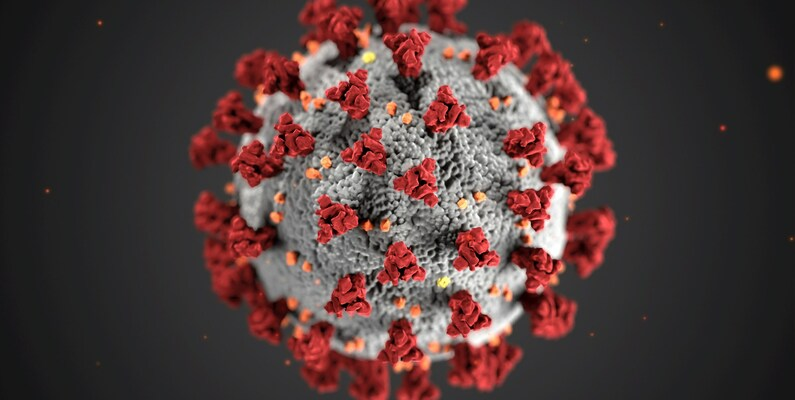![](cov.jpeg)

### **Problem Statement**

**Overview:** In this application, I will explore a dataset from Kaggle. This dataset, provided by the World Health Organization (WHO), contains weekly reported COVID-19 cases and deaths worldwide. It consists of 57,840 entries and 8 columns, covering various epidemiological statistics.


**Goal:** The primary goal of this project is to explore the COVID-19 trends around the globe and  to develop a machine learning model to predict new cases in the United States. This will involve:
* Time Series Forecasting: Predicting the number of new cases over the next few weeks in USA.


### **Data Understanding**



1. Import the necessary libraries and load the dataset into a Pandas DataFrame.
2. Understand the datastructure
   - Identify data types (numeric, categorical, text, etc.).
   - Shows basic statistics like mean, median, min, max, and standard deviation.
3. Check for missing or null values
4. Identify duplicates
5. Understand relationships between variables


### Import Module

In [121]:
!pip install pandas==2.2.2 numpy==1.26.4 --force-reinstall

  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Using cached six-1.17.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstal

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge

import plotly.express as px

import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import itertools
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Reinstalling numpy and pmdarima to resolve compatibility issues
!pip install numpy==1.26.4
!pip install pmdarima
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

print("All modules are loaded")

All modules are loaded


### Load and read WHO COVID19 global data


In [3]:
covid = pd.read_csv("WHO-COVID-19-global-data.csv", sep=';')

In [4]:
# show first 5 rows of the data
covid.head(2)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [5]:
# change column names with upper case letter to lower case
covid.columns = covid.columns.str.lower()
#covid.head(2)

In [6]:
# determine the shape of the dataframe
covid.shape

(57840, 8)

In [7]:
# check data types of each column
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_reported      57840 non-null  object 
 1   country_code       57599 non-null  object 
 2   country            57840 non-null  object 
 3   who_region         53502 non-null  object 
 4   new_cases          39028 non-null  float64
 5   cumulative_cases   57840 non-null  int64  
 6   new_deaths         25001 non-null  float64
 7   cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [8]:
# find the details of dataset
covid.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date_reported,57840,241,11/08/2024,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,57599,239,ZW,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,57840,240,Tuvalu,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,53502,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,39028.0,NaN,NaN,NaN,19881.036743,270782.29363,-65079.0,43.0,393.0,3968.0,40475477.0
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,7797691.437049,0.0,4162.75,45883.0,522087.25,103436829.0
new_deaths,25001.0,NaN,NaN,NaN,282.323947,1214.392195,-3432.0,4.0,20.0,105.0,47687.0
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,81864.399905,0.0,28.0,565.0,6974.5,1194158.0


### Handling Missing Values

In [9]:
#find the missing values
missing = covid.isnull().sum()
missing_percentage = (covid.isnull().sum() / len(covid)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print(missing_df)

                   Missing Values  Percentage
date_reported                   0    0.000000
country_code                  241    0.416667
country                         0    0.000000
who_region                   4338    7.500000
new_cases                   18812   32.524205
cumulative_cases                0    0.000000
new_deaths                  32839   56.775588
cumulative_deaths               0    0.000000


#### There is no missing country name so we will drop country code column from dataset.

In [10]:
# drop the country code column as we have country name and this column seems redundant with that
covid.drop('country_code', axis=1, inplace=True)
covid.head()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,05/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,Afghanistan,EMRO,NaN,0,NaN,0


In [11]:
# print the uniques country names
display(covid['country'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "C�te d'Ivoire",
       'Croatia', 'Cuba', 'Cura�ao', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecua

#### We see that there is encoding issues in some country names. We will fix the encoding issue.

In [12]:
# Handle encoding issues

# normalize unicode characters
import unicodedata
covid['country'] = covid['country'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

# check the unique values again to see if the encoding issues are resolved
display(covid['country'].unique())


array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cte d'Ivoire",
       'Croatia', 'Cuba', 'Curaao', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuado

In [13]:
# save dataset as csv file
covid.to_csv("covid_global.csv", index=False)
# check the encoding issue removed
#covid['country'].unique()
display(covid.head(4))

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,05/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,Afghanistan,EMRO,NaN,0,NaN,0


In [14]:
# look for unique who region
display(covid['who_region'].unique())

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'],
      dtype=object)

In [15]:
# replace the missing values of who region with 'OTHER'
covid['who_region'].fillna('OTHER', inplace=True)
covid['who_region'].isna().sum()
covid['who_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'OTHER'],
      dtype=object)

We will impute missing values in weekly new cases and weekly new deaths as zeros. This approach assumes that unreported data most likely reflects no new cases/deaths that week, rather than an unknown value. This aligns with public health reporting practices, ensures time series continuity, and prevents model errors from undefined values.

In [16]:
# fill missing values in  new cases with zero
covid['new_cases'].fillna(0, inplace=True)
print(covid['new_cases'].isna().sum())

# fill missing values in  deaths with zero
covid['new_deaths'].fillna(0, inplace=True)
print(covid['new_deaths'].isna().sum())



0
0


In [17]:
# format the date reported
covid['date_reported'] = pd.to_datetime(covid['date_reported'], format='%d/%m/%Y')
covid['date_reported'].nunique()

241

In [18]:
# add a new column as year
covid['year'] = covid['date_reported'].dt.year
covid['year'].unique()
covid['year'].isna().sum()

0

In [19]:
# check the stats of the dataset
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,57840,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country,57840,240,Tuvalu,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,57840,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,57840.0,NaN,NaN,NaN,13414.887656,-65079.0,0.0,47.0,1242.25,40475477.0,222624.444618
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,0.0,4162.75,45883.0,522087.25,103436829.0,7797691.437049
new_deaths,57840.0,NaN,NaN,NaN,122.032867,-3432.0,0.0,0.0,12.0,47687.0,810.554113
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,0.0,28.0,565.0,6974.5,1194158.0,81864.399905
year,57840.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026


### As we see that the dataset has some negative values, which does not make sense for the cases. We will replace those negative values with zero.

In [20]:
# # replace all the numerical columns with negative entries in dataset with zero
covid.loc[covid['new_cases'] < 0, 'new_cases'] = 0
covid.loc[covid['new_deaths'] < 0, 'new_deaths'] = 0
covid.loc[covid['cumulative_cases'] < 0, 'cumulative_cases'] = 0
covid.loc[covid['cumulative_deaths'] < 0, 'cumulative_deaths'] = 0
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,57840,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country,57840,240,Tuvalu,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,57840,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,57840.0,NaN,NaN,NaN,13416.06805,0.0,0.0,47.0,1242.25,40475477.0,222624.208895
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,0.0,4162.75,45883.0,522087.25,103436829.0,7797691.437049
new_deaths,57840.0,NaN,NaN,NaN,122.101366,0.0,0.0,0.0,12.0,47687.0,810.416881
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,0.0,28.0,565.0,6974.5,1194158.0,81864.399905
year,57840.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026


In [21]:
# remove all the zeros from cases data for future analysis where we need nonzero numbers
covid = covid[covid['new_cases'] != 0]
covid = covid[covid['new_deaths'] != 0]
covid = covid[covid['cumulative_cases'] != 0]
covid = covid[covid['cumulative_deaths'] != 0]

In [22]:
# Check for duplicates
covid.duplicated().sum()

0

In [23]:
#check the min and max and stats for the new dataset
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,24805,NaN,NaN,NaN,2021-11-25 03:52:19.641201408,2020-01-05 00:00:00,2021-01-31 00:00:00,2021-10-24 00:00:00,2022-08-07 00:00:00,2024-08-11 00:00:00,NaN
country,24805,227,Italy,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,24805,7,EURO,8769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,24805.0,NaN,NaN,NaN,30853.8385,1.0,336.0,1884.0,9833.0,40475477.0,338685.810776
cumulative_cases,24805.0,NaN,NaN,NaN,2812505.260633,1.0,30354.0,260234.0,1453522.0,103436829.0,9320949.199959
new_deaths,24805.0,NaN,NaN,NaN,281.121145,1.0,4.0,20.0,104.0,47687.0,1217.029844
cumulative_deaths,24805.0,NaN,NaN,NaN,33870.540536,1.0,417.0,3923.0,19611.0,1127152.0,98212.07801
year,24805.0,NaN,NaN,NaN,2021.411611,2020.0,2021.0,2021.0,2022.0,2024.0,1.074612


# Exploratory Data Analysis (EDA) Global
Here I have performed the EDA for global WHO data.

In [24]:
# Group data by country and sum new cases
cases_by_country = covid.groupby('country')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
cases_by_country = cases_by_country.sort_values('new_cases', ascending=False)

In [25]:
# the number of cases in different countries shown in the map
import plotly.express as px

fig = px.choropleth(
    cases_by_country,
    locations="country",
    locationmode="country names",
    color="new_cases",
    color_continuous_scale="Reds",
    title="A glance of Total COVID-19 Cases by Country on the World Map"
)
fig.show()

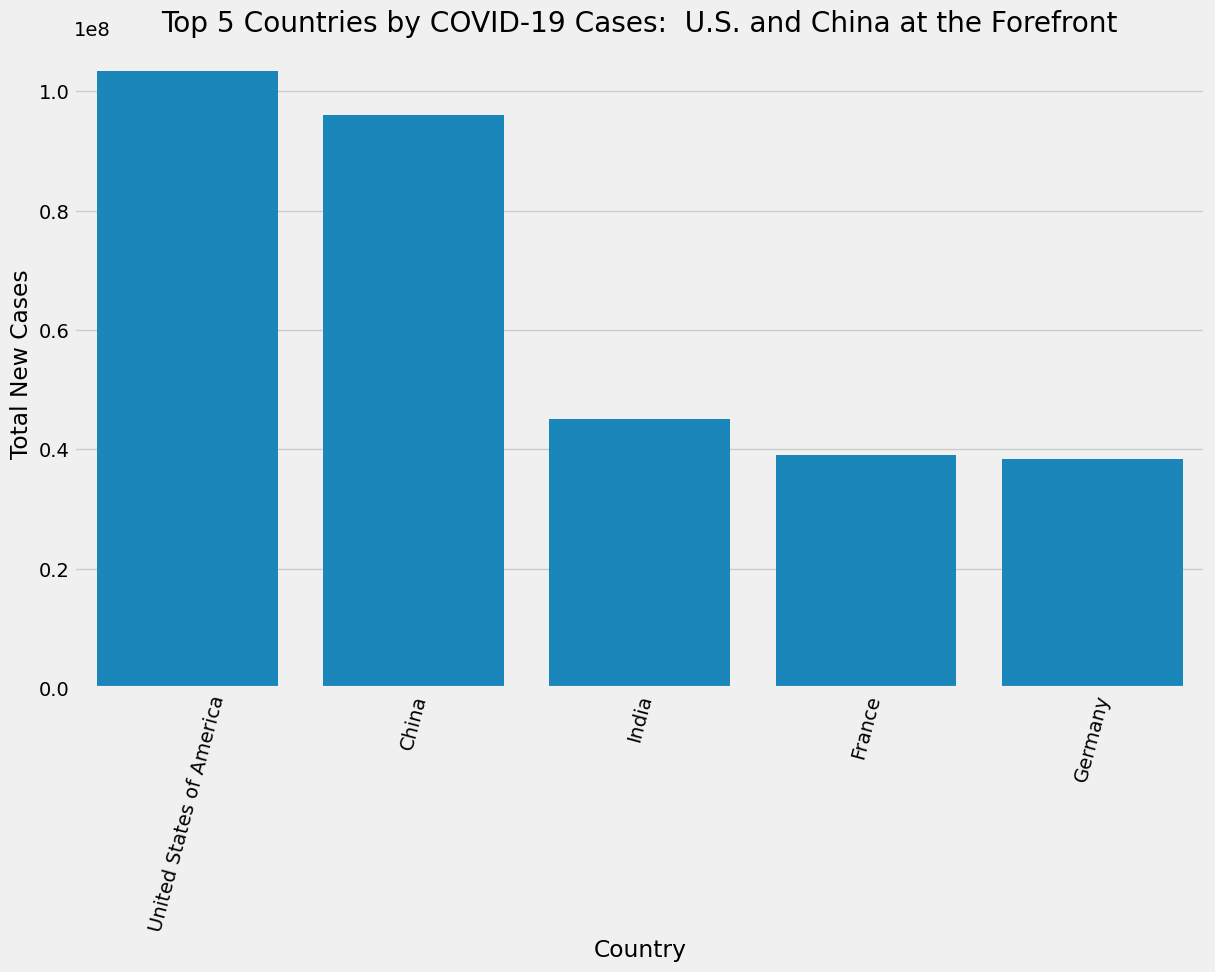

In [26]:
# Plot the distribution of new cases per country for top 5 countries
plt.figure(figsize=(13, 8))
sns.barplot(x='country', y='new_cases', data=cases_by_country.head(5))
plt.xticks(rotation=75)
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.title('Top 5 Countries by COVID-19 Cases:  U.S. and China at the Forefront')
plt.show()


### The above distribution of total cases by the country represents the pandemic disparity across the globe. U.S. and China’s COVID-19 cases skyrocket beyond other countries in the globe.

### It is also important to note that the cases numbers are very large so it would be better to transform the numbers into log.

In [27]:
# Select numerical columns for log transformation and drop year column
num_cols = covid.select_dtypes(include=np.number).columns.drop(['year'])

# Apply log transformation to numerical columns, handling potential zeros
for col in num_cols:
    # Add 1 to handle zero values before taking the log
    covid[col + '_log'] = np.log1p(covid[col])

# Print the updated DataFrame to see the new log-transformed columns
display(covid.head(2))


,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,new_cases_log,cumulative_cases_log,new_deaths_log,cumulative_deaths_log
12,2020-03-29,Afghanistan,EMRO,67.0,91,2.0,2,2020,4.219508,4.521789,1.098612,1.098612
13,2020-04-05,Afghanistan,EMRO,183.0,274,3.0,5,2020,5.214936,5.616771,1.386294,1.791759


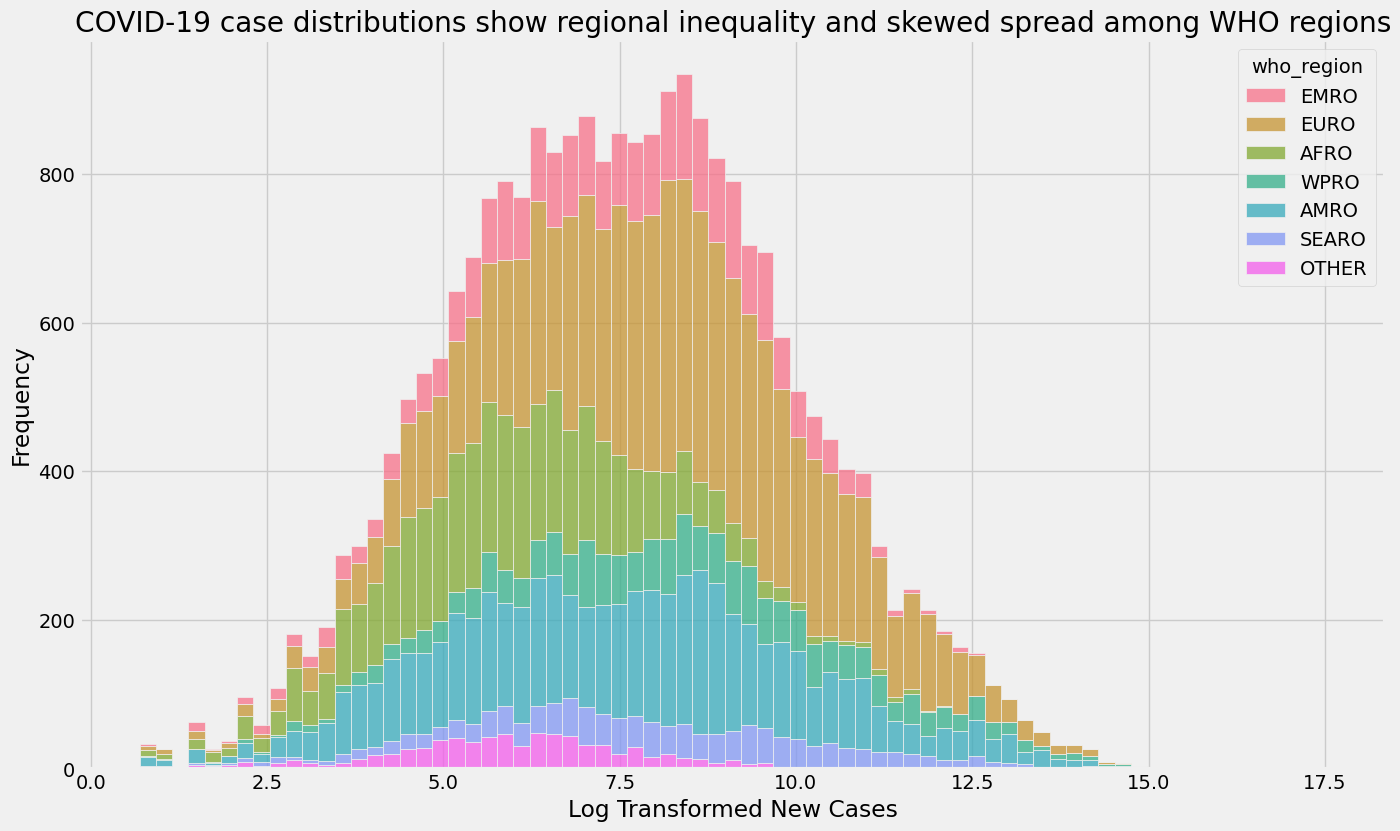

In [28]:
# Plot the distribution of log transformed new cases among the who region
plt.figure(figsize=(15, 9))
sns.histplot(covid, x='new_cases_log', hue='who_region', multiple="stack")
plt.title('COVID-19 case distributions show regional inequality and skewed spread among WHO regions')
plt.xlabel('Log Transformed New Cases')
plt.ylabel('Frequency')
plt.show()

This plot represents the **distribution of log-transformed COVID-19 new cases across different WHO regions**.

- Each color represents a different WHO region:
  - **EMRO** and **EURO** seem to have the **highest frequency** at higher case counts (right tail). This suggests that many countries in these regions experienced large outbreaks more frequently.
  - **AFRO** and **SEARO** dominate the **lower range**, implying many countries had smaller case counts more frequently.
  - **WPRO** and **AMRO** show a **broad spread**, suggesting more variation within those regions.

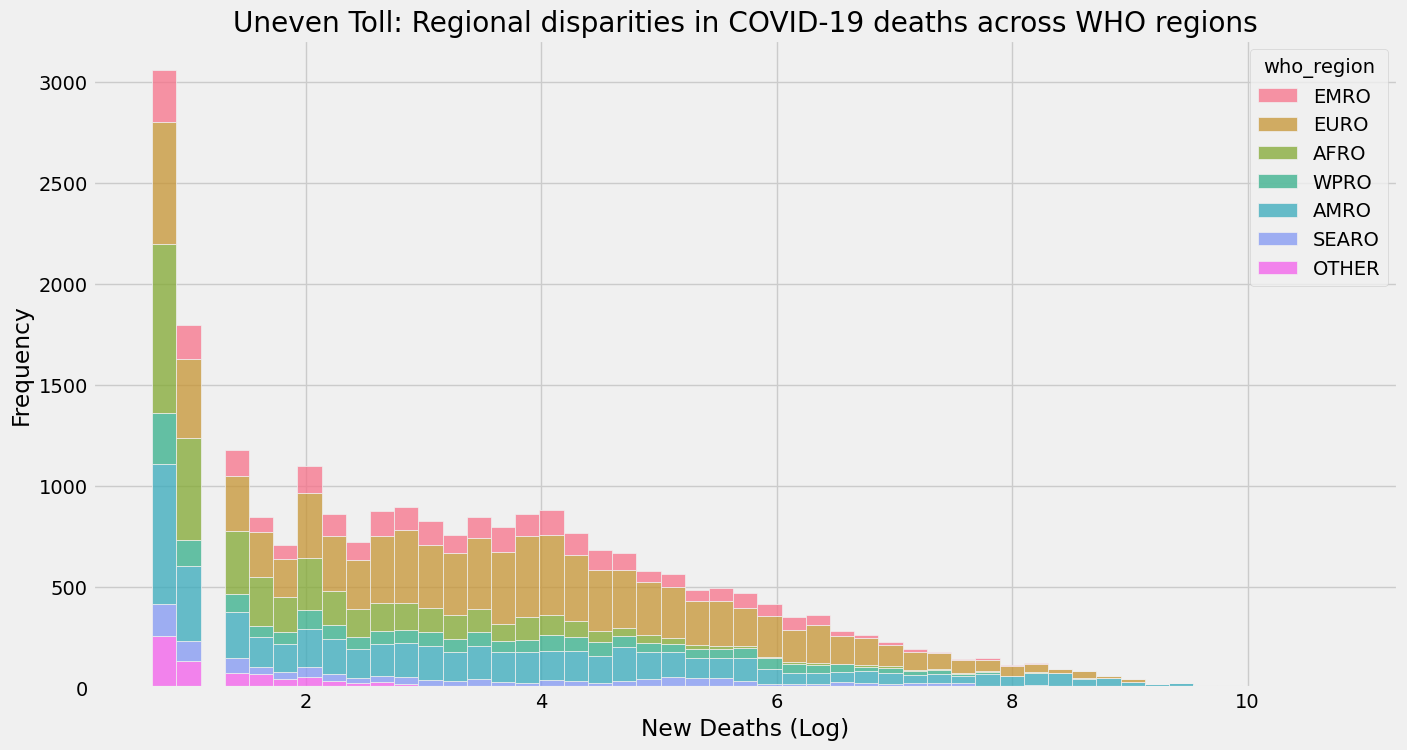

In [29]:
# Plot the distribution of log transformed new deaths among the whon region
plt.figure(figsize=(15, 8))
sns.histplot(covid, x='new_deaths_log', hue='who_region', multiple="stack")
plt.title('Uneven Toll: Regional disparities in COVID-19 deaths across WHO regions')
plt.xlabel('New Deaths (Log)')
plt.ylabel('Frequency')
plt.show()

This plot shows the **distribution of log-transformed COVID-19 new deaths** across different **WHO regions**.

The distribution is **right-skewed** — meaning most regions have lower numbers of new deaths (with values concentrated on the left), while fewer observations have high death counts. This is typical for pandemic death data, where many areas report low deaths, but a few regions experience severe outbreaks.

- **EURO** and **EMRO** seem to contribute significantly to the higher death counts, especially in the middle range.  
- **AFRO** and **AMRO** also show notable contributions, though less pronounced than Europe and the Eastern Mediterranean.  
- **SEARO** and **WPRO** contribute primarily to the lower range, suggesting fewer regions or countries with high new death counts.  


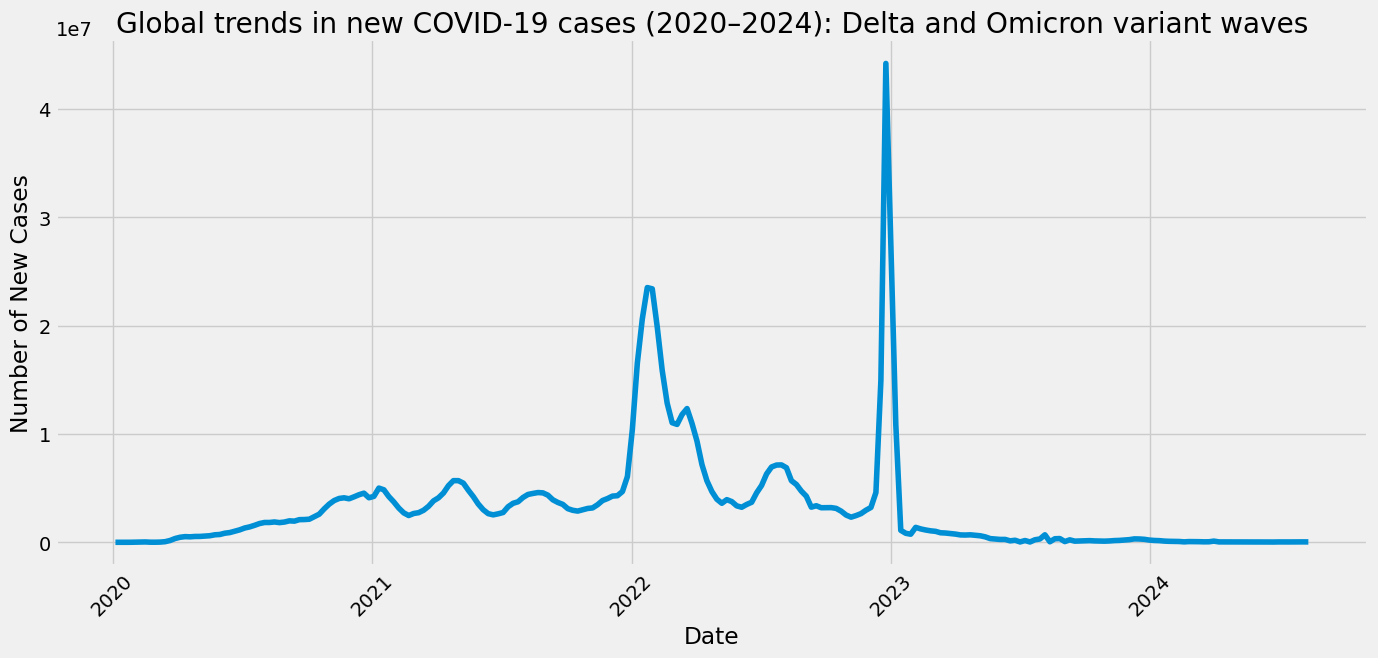

In [30]:
# Group the data by date and sum the new cases for each date
cases_over_time = covid.groupby('date_reported')['new_cases'].sum()

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(cases_over_time.index, cases_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('Global trends in new COVID-19 cases (2020–2024): Delta and Omicron variant waves')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Key Takeaways:**

The two peaks in 2022 and 2023 suggests different waves of infection (e.g., Delta and Omicron waves).

The other small peaks suggests the first outbreak started in the end of 2020 and then subsided slightly and then again started increasing in mid 2021 declining slightly due to the interventions. First peak occured in starting of 2022 and started to decrease due to interventions. The second peak suged in the winters of 2022 due to another variant of the virus and started decline due to interventions and vaccination. As of 2023 spring there was no outbreak of COVID-19.


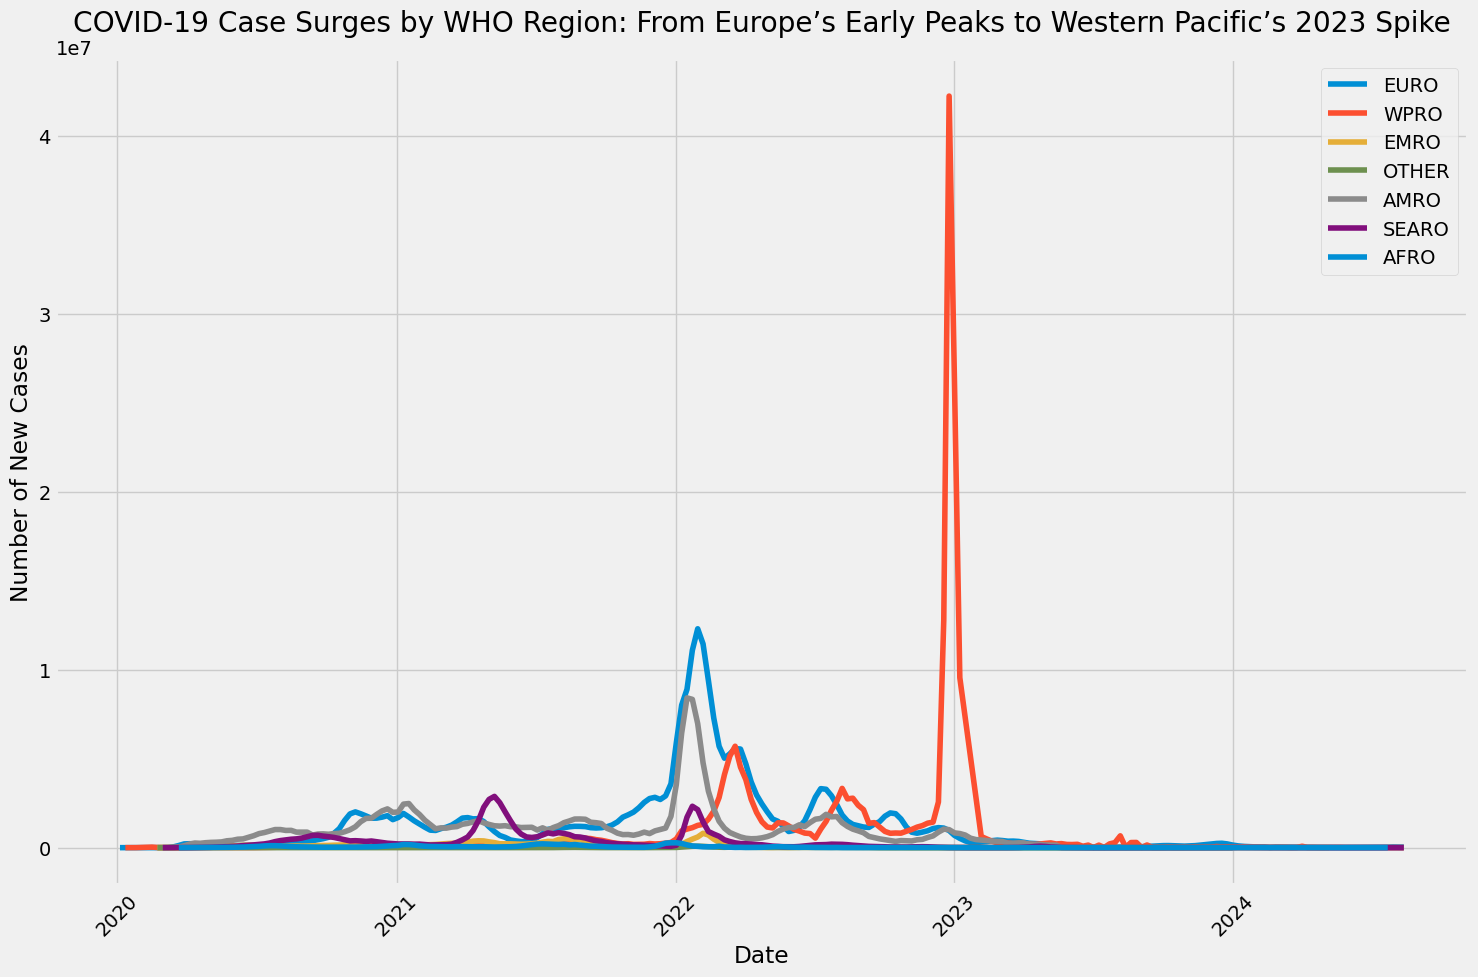

In [31]:
# Group data by date and region, then sum new cases
cases_over_time_by_region = covid.groupby(['date_reported', 'who_region'])['new_cases'].sum().reset_index()

# Create the plot
plt.figure(figsize=(15, 10))
for region in cases_over_time_by_region['who_region'].unique():
    region_data = cases_over_time_by_region[cases_over_time_by_region['who_region'] == region]
    plt.plot(region_data['date_reported'], region_data['new_cases'], label=region)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('COVID-19 Case Surges by WHO Region: From Europe’s Early Peaks to Western Pacific’s 2023 Spike')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


From this plot we see that EURO had highest number of cases in starting of 2022 and WPRO had highest number of cases in the end of 2022. Several peaks are visible, corresponding to major waves of COVID-19 outbreaks.
The most prominent spike appears in 2023 (Western Pacific - WPRO, in orange), reaching over 40 million cases. This could be due to data reporting anomalies or a specific outbreak. Other significant peaks occur around 2021 and 2022, mainly driven by Europe (EURO) and the Americas (AMRO). After each major peak, case numbers drop significantly, likely due to vaccination efforts, public health interventions, and herd immunity. By late 2023 and early 2024, the number of new cases appears relatively low in all regions.

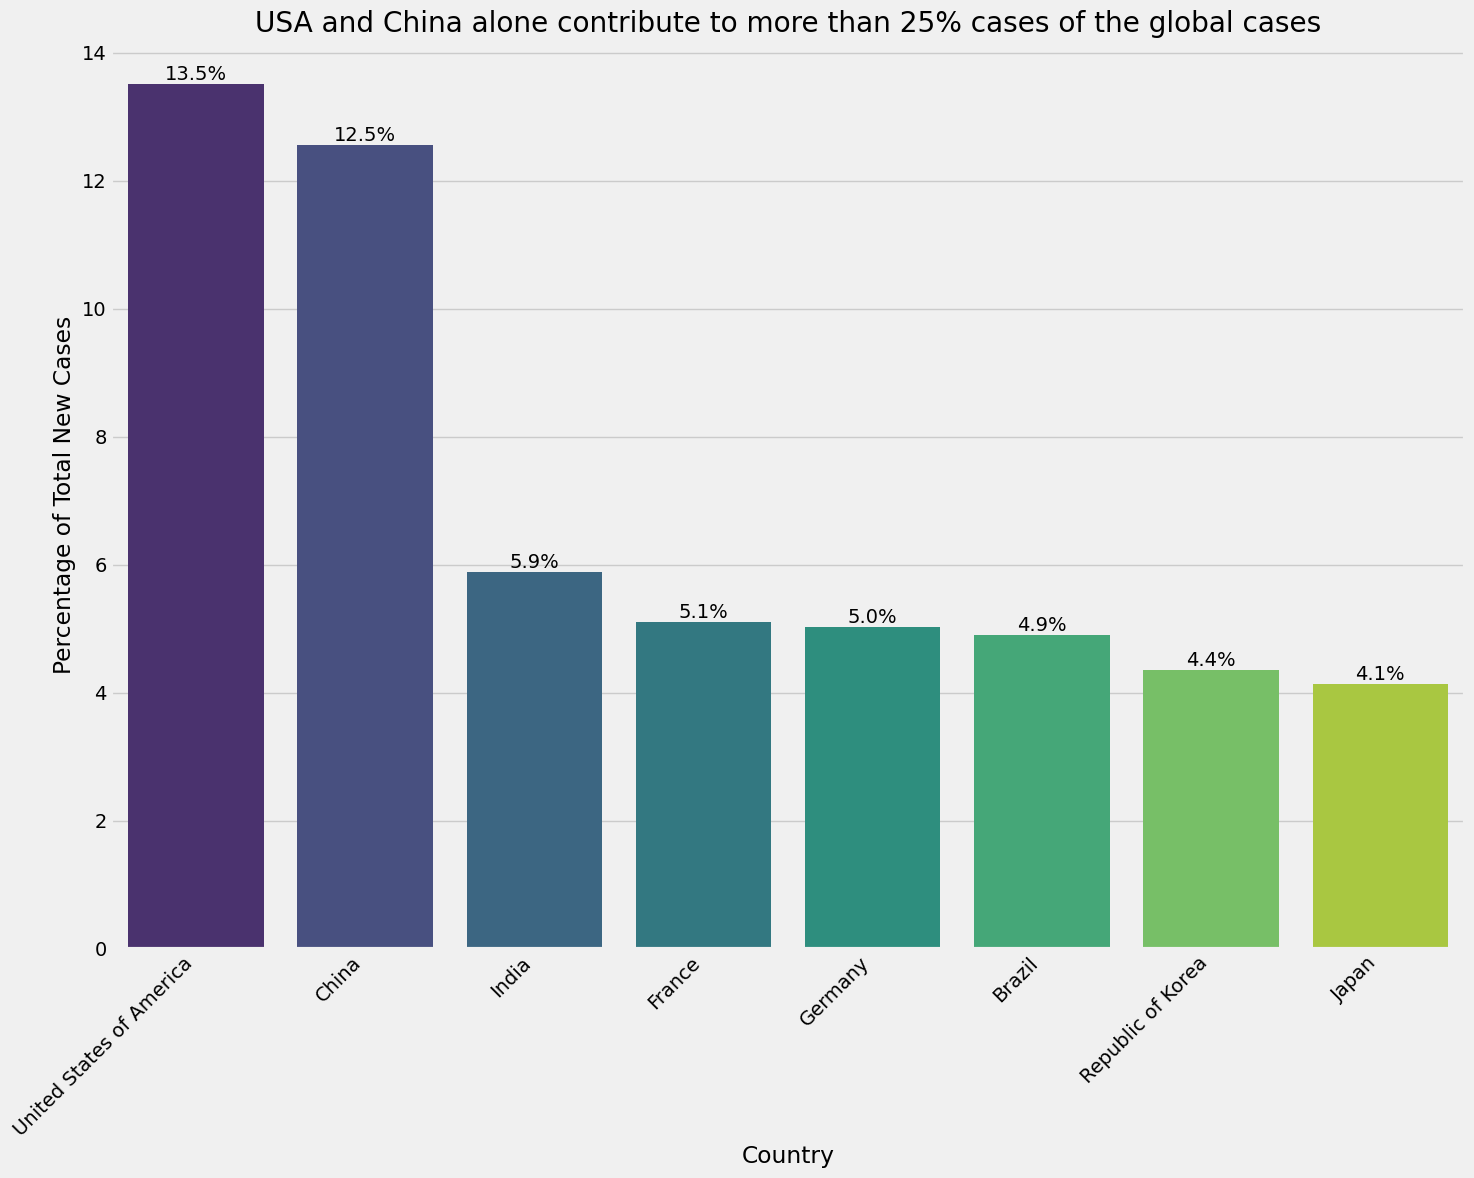

In [32]:
# Group data by country and sum new cases
cases_by_country = covid.groupby('country')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
top_8_countries = cases_by_country.sort_values('new_cases', ascending=False).head(8)

# Calculate the percentage of new cases for each country
total_cases = cases_by_country['new_cases'].sum()
top_8_countries['percentage'] = (top_8_countries['new_cases'] / total_cases) * 100


# Create the bar plot with percentage labels and custom colors
plt.figure(figsize=(15, 12))
bars = sns.barplot(x=top_8_countries['country'], y=top_8_countries['percentage'], data=top_8_countries, palette="viridis") # Example color palette
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Percentage of Total New Cases')
plt.title('USA and China alone contribute to more than 25% cases of the global cases')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, top_8_countries['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


The bar chart shows the percentage of new cases in top 8 countries. The USA and China has highest number of infected cases, 13.5% and 12.5% respectively.  Japan has lowest number of infected cases, 4.1% among these top 8 countries.

### Visualize Death Cases

In [33]:
# Group data by country and sum new deaths
deaths_by_country = covid.groupby('country')['new_deaths'].sum().reset_index()

# the number of cases in different countries shown in the map
import plotly.express as px

fig = px.choropleth(
    deaths_by_country,
    locations="country",
    locationmode="country names",
    color="new_deaths",
    color_continuous_scale="Cividis",
    title="A glance of total COVID-19 deaths by country on the world map"
)
fig.show()

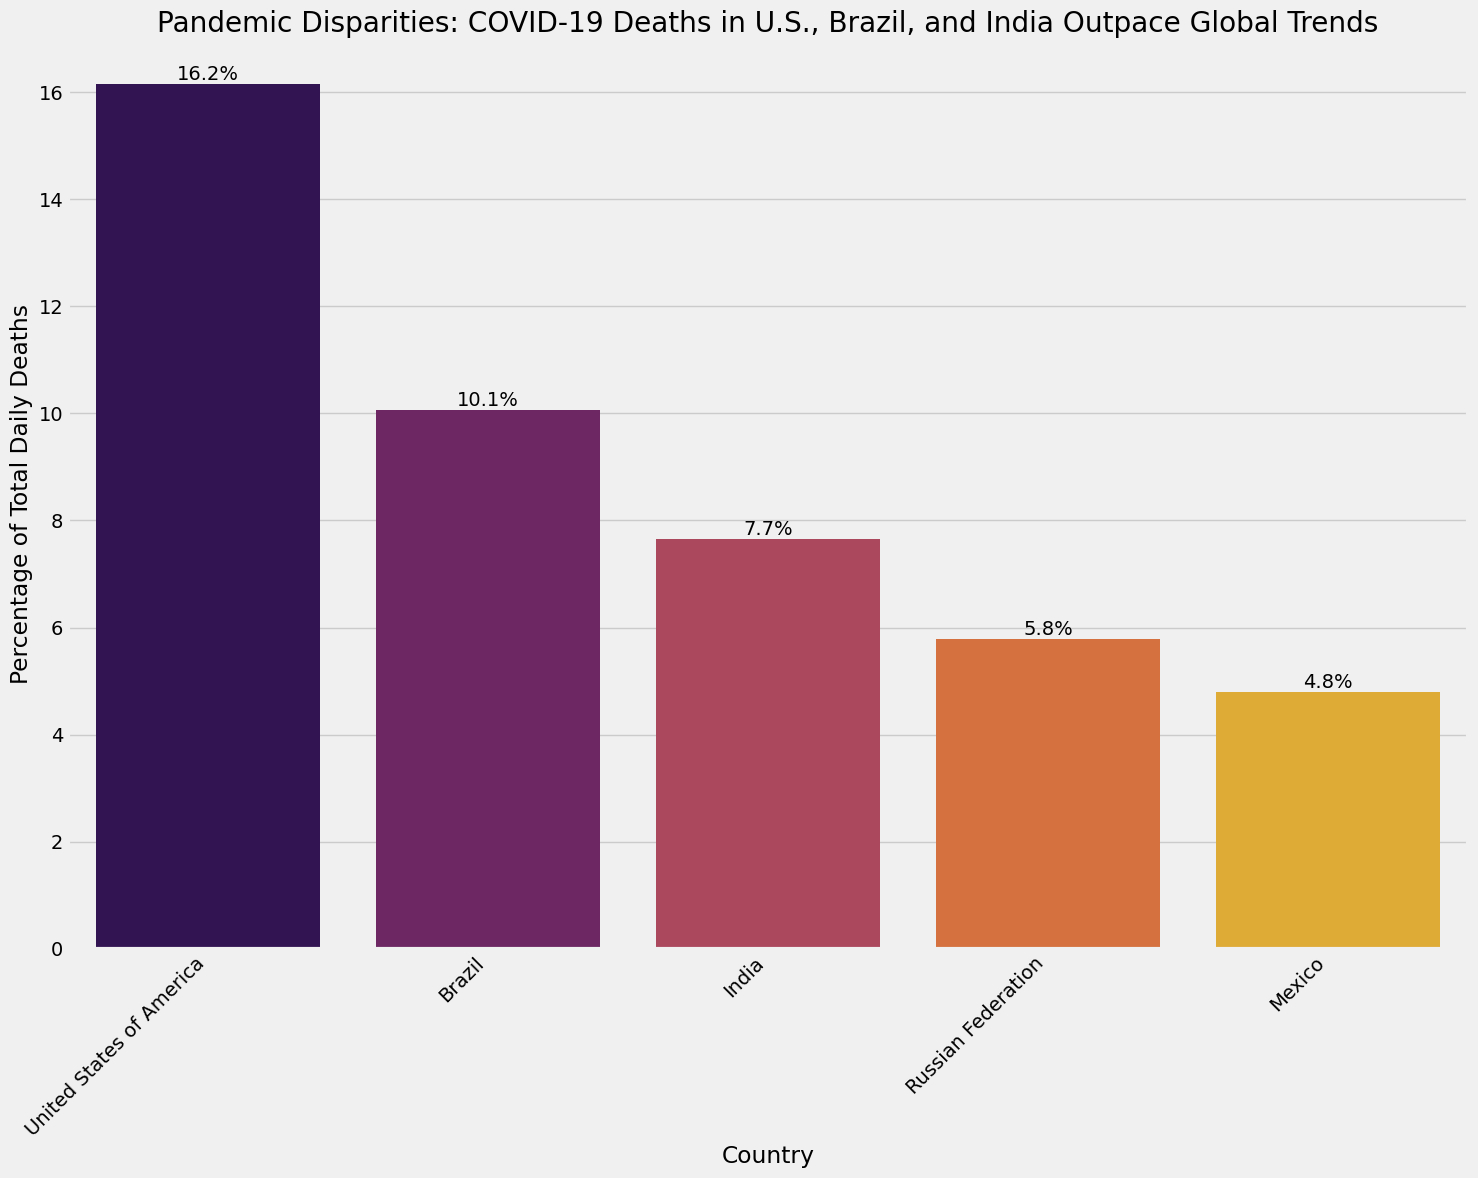

In [34]:
# Sort countries by total deaths in descending order
top_5_countries_deaths = deaths_by_country.sort_values('new_deaths', ascending=False).head(5)

# Calculate the percentage of new deaths for each country
total_deaths = deaths_by_country['new_deaths'].sum()
top_5_countries_deaths['percentage'] = (top_5_countries_deaths['new_deaths'] / total_deaths) * 100


# Create the bar plot with percentage labels and custom colors for deaths
plt.figure(figsize=(15, 12))
bars = sns.barplot(x=top_5_countries_deaths['country'], y=top_5_countries_deaths['percentage'], data=top_5_countries_deaths, palette="inferno")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Percentage of Total Daily Deaths')
#plt.title('Top 8 Countries by Percentage of Total COVID-19 Deaths')
plt.title('Pandemic Disparities: COVID-19 Deaths in U.S., Brazil, and India Outpace Global Trends')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars.patches, top_5_countries_deaths['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In this bar plot, US (16.2%) shows largest share of new deaths among all 5 countries. Indicates a high mortality burden in US. Mexico (4.8%) shows lowest percentage in the group, suggesting better pandemic control post-2021.

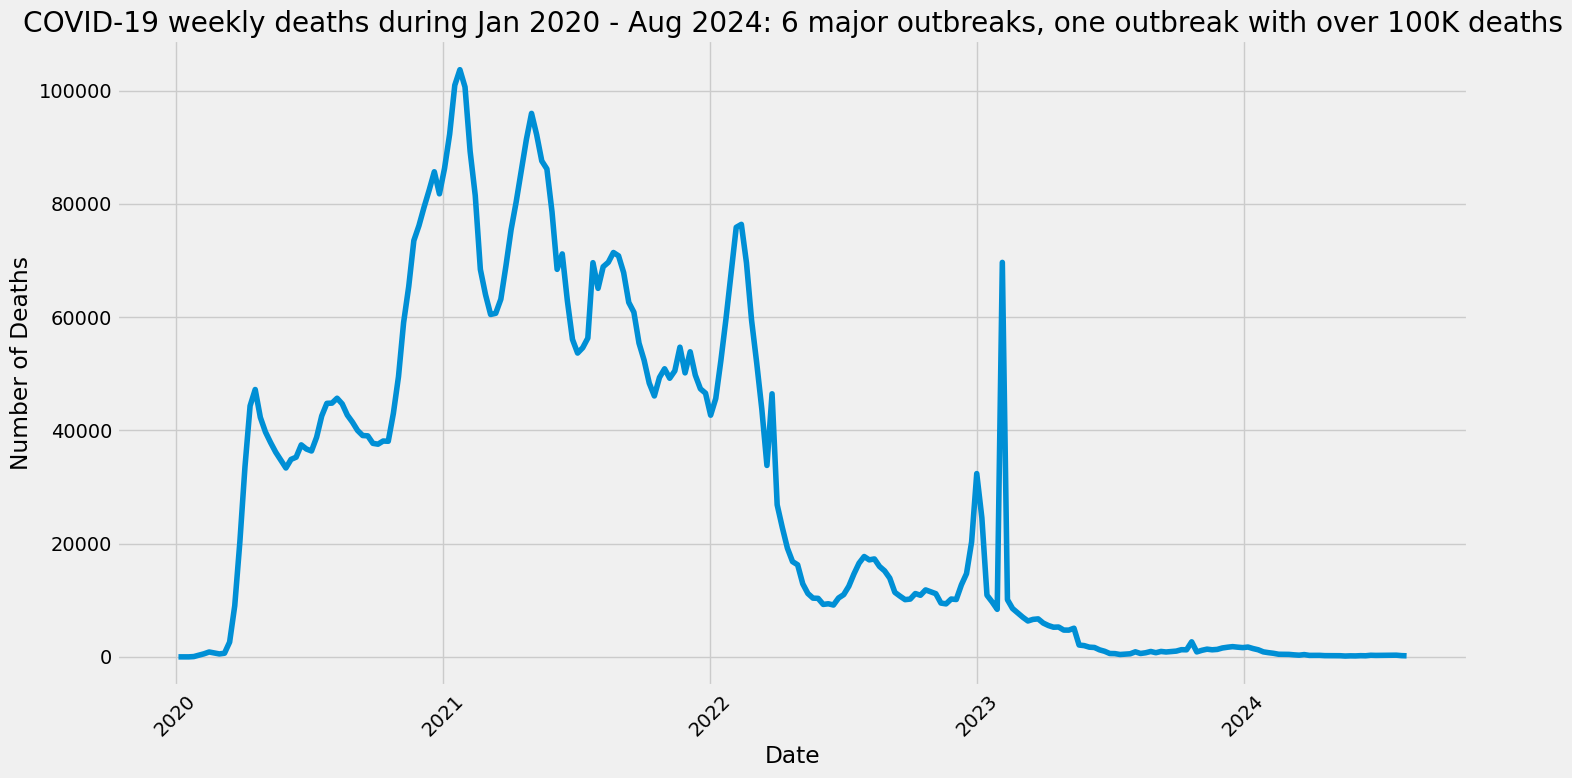

In [35]:
# Group data by date and sum the new deaths for each date
deaths_over_time = covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(deaths_over_time.index, deaths_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 weekly deaths during Jan 2020 - Aug 2024: 6 major outbreaks, one outbreak with over 100K deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows that there were around 6 surges in number of deaths i.e. outbreak. It is also clear that the number of deaths are higher in recent years (peak in first quarter of 2021) due to the lack of intervention strategies for this new virus. The peak in starting of 2022 and end of 2022 shows that there was not enough intervent or treatment available to handle the huge surge in new cases.

            new_cases  new_deaths      year
new_cases    1.000000    0.288730  0.017114
new_deaths   0.288730    1.000000 -0.089016
year         0.017114   -0.089016  1.000000


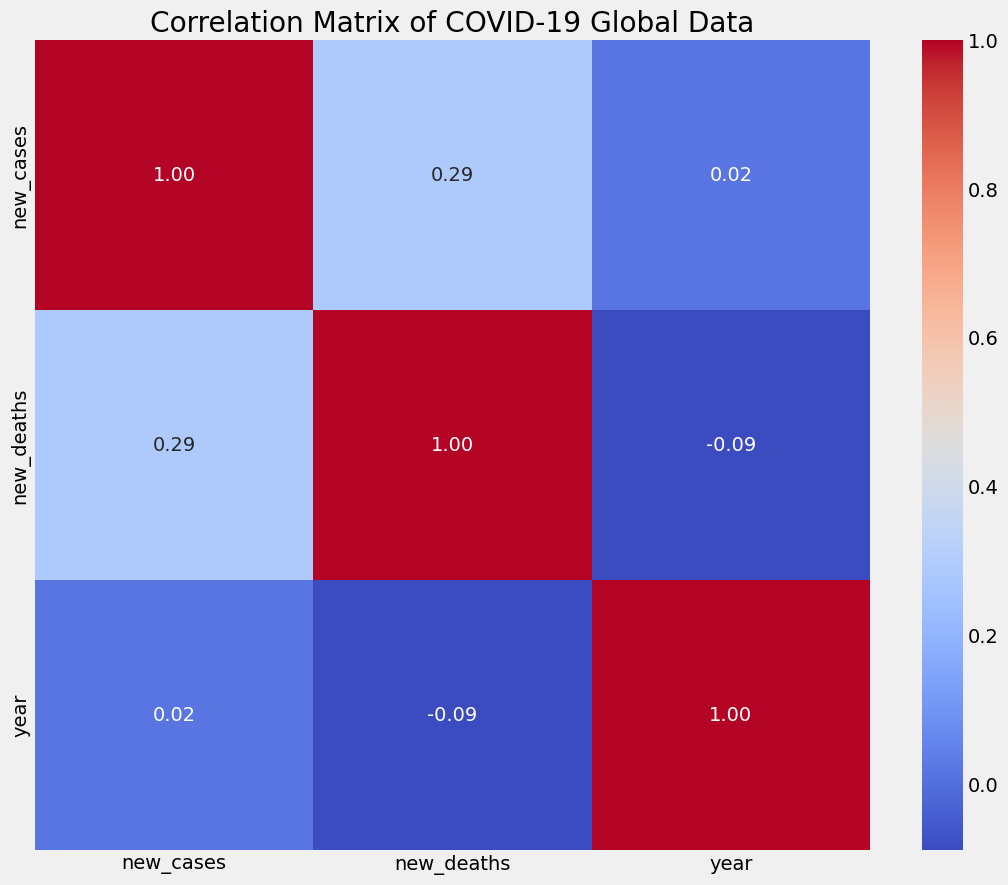

In [36]:
#correlation matrix for global data

corr_matrix = covid[['new_cases', 'new_deaths',  'year']].corr(numeric_only=True)

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Global Data')
plt.show()

We see that  new cases and new deaths are weakly positively correlated — more cases don’t always result in more deaths (likely due to medical advancements or less severe strains).
Time progression (year) doesn’t strongly correlate with either cases or deaths, implying COVID-19 trends are more driven by external events (e.g., policy changes, new variants, behavior changes) than a smooth year-to-year pattern.

## As we have seen that the highest cases were in USA and highest deaths were reported in USA. Now we will do EDA for USA and perform modeling for USA.

# **EDA for USA**
Here we will perform the EDA for USA.


In [37]:
# Reload the global who data to extract only country USA

us_covid = covid[covid["country"] == "United States of America"]

In [38]:
# save us covid data to us-covid csv file
us_covid.to_csv("us_covid.csv", index=False)
us_covid.head()

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,new_cases_log,cumulative_cases_log,new_deaths_log,cumulative_deaths_log
55197,2020-03-01,United States of America,AMRO,33.0,73,1.0,1,2020,3.526361,4.304065,0.693147,0.693147
55198,2020-03-08,United States of America,AMRO,391.0,464,18.0,19,2020,5.971262,6.142037,2.944439,2.995732
55199,2020-03-15,United States of America,AMRO,3465.0,3929,50.0,69,2020,8.150756,8.276395,3.931826,4.248495
55200,2020-03-22,United States of America,AMRO,27486.0,31415,305.0,374,2020,10.221468,10.355073,5.723585,5.926926
55201,2020-03-29,United States of America,AMRO,94894.0,126309,1732.0,2106,2020,11.460526,11.746494,7.457609,7.653020


In [39]:
# sort the us covid dataset as per date
us_covid = us_covid.sort_values("date_reported")
us_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 55197 to 55364
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_reported          168 non-null    datetime64[ns]
 1   country                168 non-null    object        
 2   who_region             168 non-null    object        
 3   new_cases              168 non-null    float64       
 4   cumulative_cases       168 non-null    int64         
 5   new_deaths             168 non-null    float64       
 6   cumulative_deaths      168 non-null    int64         
 7   year                   168 non-null    int32         
 8   new_cases_log          168 non-null    float64       
 9   cumulative_cases_log   168 non-null    float64       
 10  new_deaths_log         168 non-null    float64       
 11  cumulative_deaths_log  168 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)

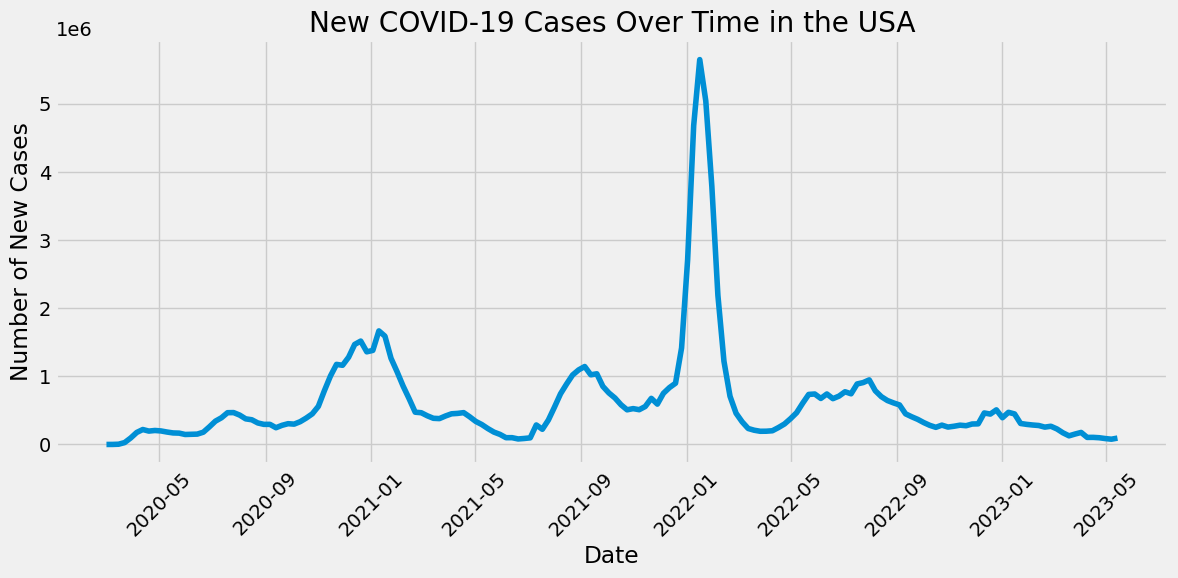

In [40]:
# plot the usa new cases over time

# Group data by date and sum new cases for the US
us_cases_over_time = us_covid.groupby('date_reported')['new_cases'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_cases_over_time.index, us_cases_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Cases Over Time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot suggests multiple outbreaks during end of 2020 and end of 2022. The highest infection surge occured during Dec 2021 - Feb 2022. And there is no outbreaak as of now.

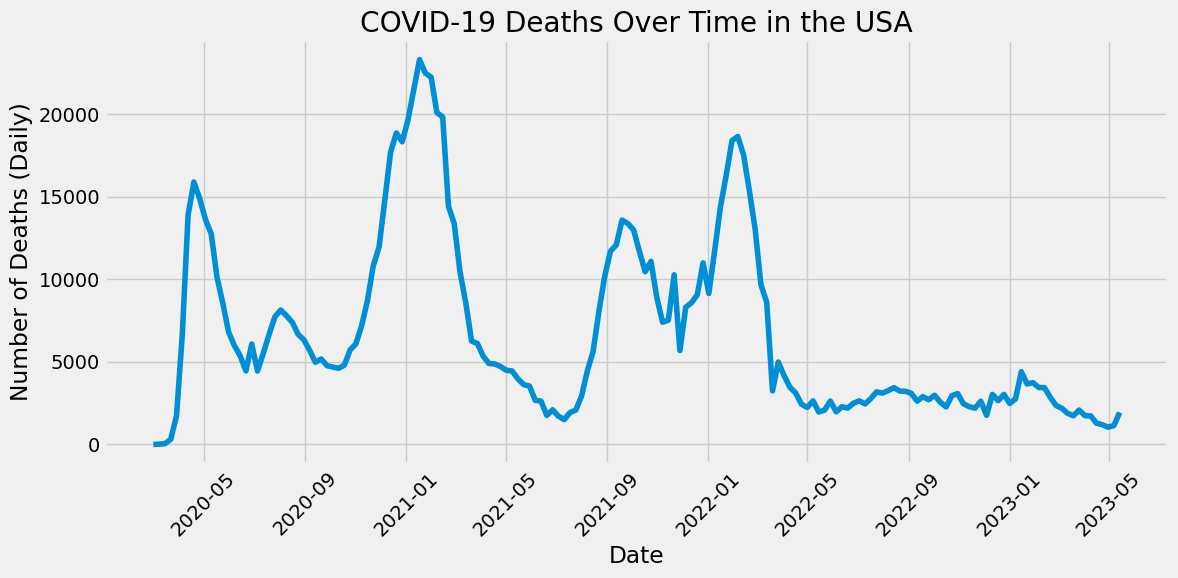

In [41]:
# plot the usa new deaths over time

# Group data by date and sum new deaths for the US
us_deaths_over_time = us_covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_deaths_over_time.index, us_deaths_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of Deaths (Daily)')
plt.title('COVID-19 Deaths Over Time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Five peaks in this plot, shows the deadlieast death toll during March 2020 - Feb 2022. The largest peak during end of 2020 and start of 2021 shows highest death toll. Second highest peak in early 2022 shows the impact of COVID virus variant Omicron. Gradualy decreasing after mid-2022 but still fluctuating slightly.

### Case Fatality Rate (CFR) Analysis

In [42]:
# Case Fatality Rate (CFR) Analysis
us_covid["CFR"] = (us_covid["cumulative_deaths"] / us_covid["cumulative_cases"]) * 100
us_covid["CFR"].isna().sum()

0

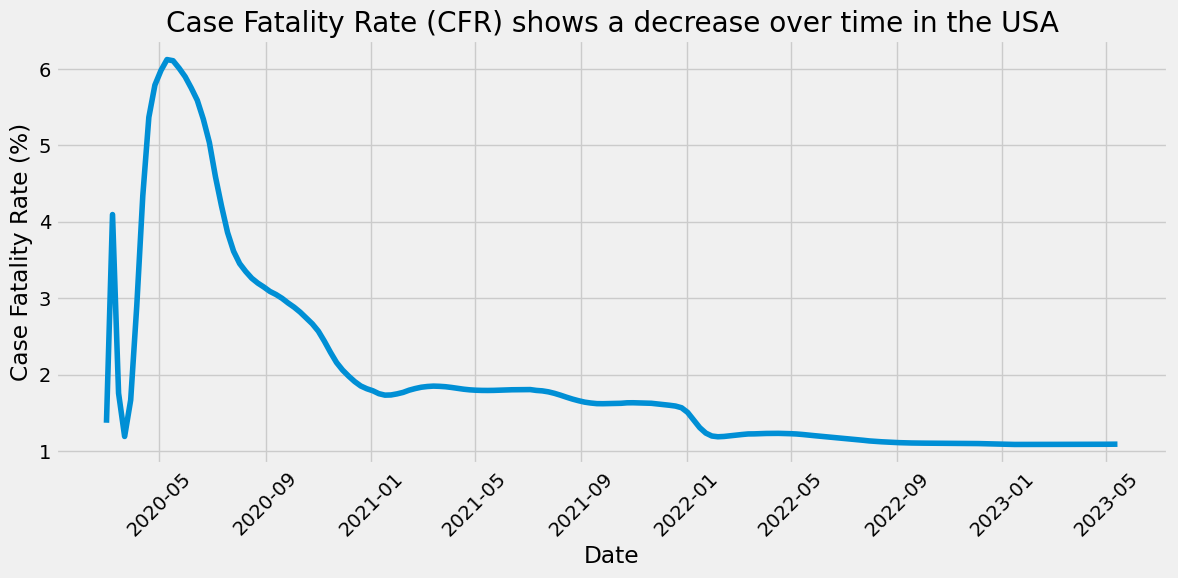

In [43]:
# Plot Case Fatality Rate (CFR) over time for the US
plt.figure(figsize=(12, 6))
plt.plot(us_covid['date_reported'], us_covid['CFR'])
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.title('Case Fatality Rate (CFR) shows a decrease over time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The 2 peaks in CFR plot suggests that the high fatality rate from early 2020 to late 2020. Gradual decline suggests the availability of better intervention and vaccination.

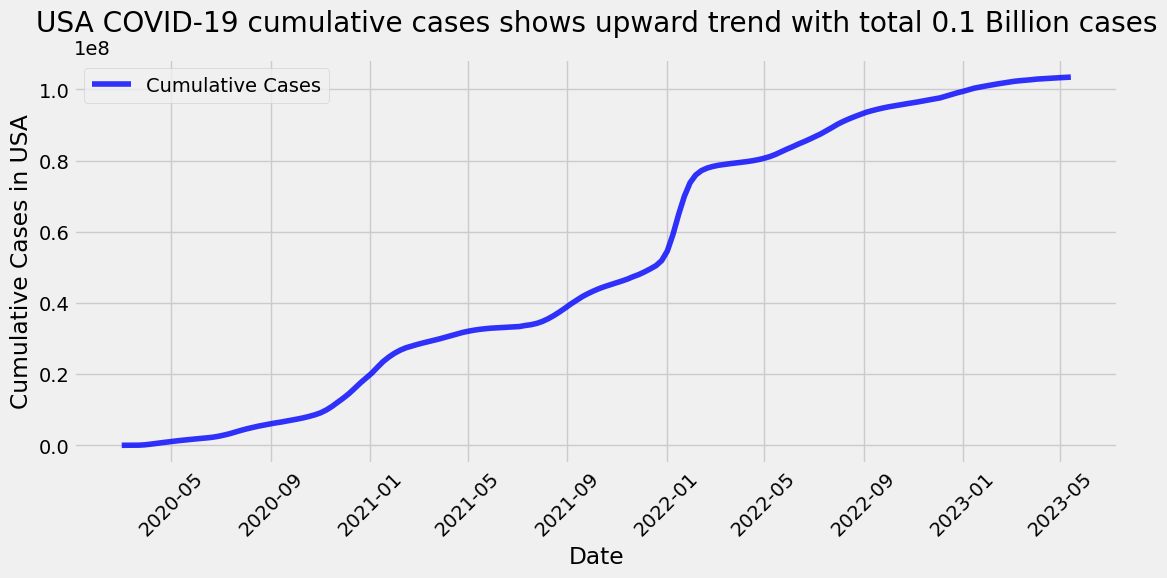

In [44]:
# USA-specific trend
us_covid = covid[covid['country'] == 'United States of America'].groupby('date_reported')[['new_cases', 'cumulative_cases']].sum()

plt.figure(figsize=(12,5))
#plt.plot(us_covid.index, us_covid['new_cases'], label="Daily New Cases", alpha=0.6, color='red')
plt.plot(us_covid.index, us_covid['cumulative_cases'], label="Cumulative Cases", alpha=0.8, color='blue')
plt.title("USA COVID-19 cumulative cases shows upward trend with total 0.1 Billion cases")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases in USA")
plt.xticks(rotation=45)
plt.legend()
plt.show()



The above plot shows cumulative infected cases in USA are now 103436829.

# Predict the spread of COVID19 across US
Here we will do the modeling for USA new cases forecasting.

## Data Preparation
After our initial exploration and fine-tuning of the cases understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [45]:
# Data preprocessing for ARIMA model
# first reload us dataset with date column as index and include new cases only
us_df= covid[covid["country"] == "United States of America"].set_index("date_reported")[['new_cases']]

us_df.head()

,new_cases
date_reported,
2020-03-01,33.0
2020-03-08,391.0
2020-03-15,3465.0
2020-03-22,27486.0
2020-03-29,94894.0


### Data Training

In [46]:
# train and split the dataset
y_hist, y_future= train_test_split(us_df, shuffle=False)

In [47]:
# sample historical data
y_hist.head()

,new_cases
date_reported,
2020-03-01,33.0
2020-03-08,391.0
2020-03-15,3465.0
2020-03-22,27486.0
2020-03-29,94894.0


In [48]:
# import modules for autocorrelation
import statsmodels.graphics.tsaplots as tsaplots

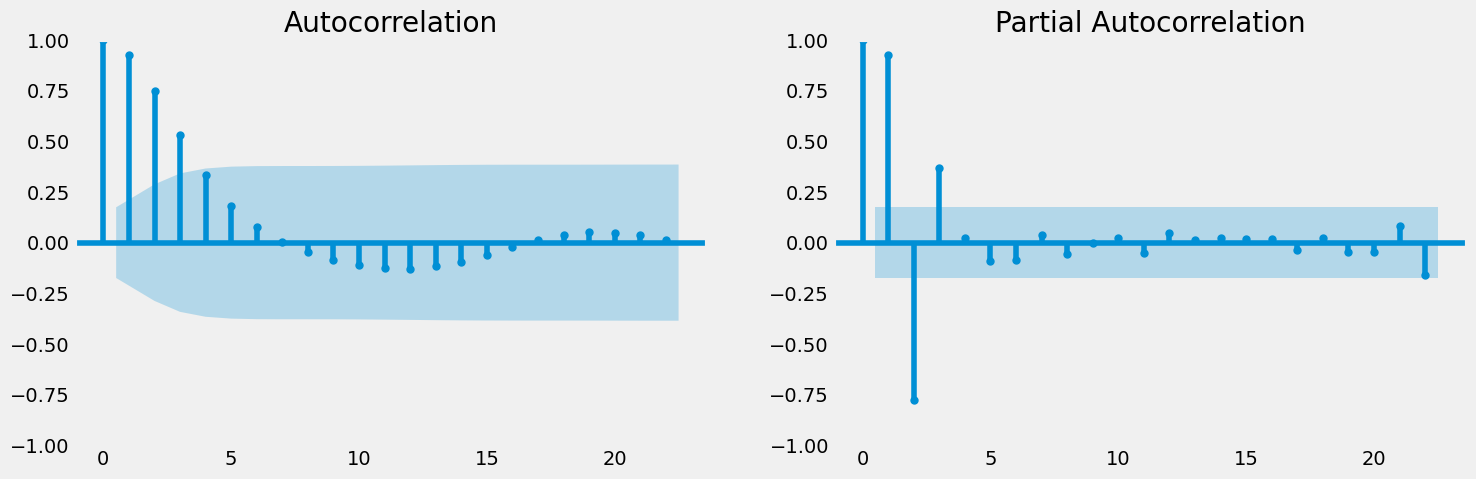

In [49]:
# chek if the data is stationary
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
tsaplots.plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
tsaplots.plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

# **Modeling**

With final dataset in hand, it is now time to build some models.  Here, I will use time-series forecasting models to predict the new cases in USA.

### **ARIMA Model**

Use grid search cv for optimal hyperparameters.

In [50]:
# use grid search cv to find the optimal p, d, and q for arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools


p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic_a = float("inf")
best_order_a = None
best_model_a = None
best_mae_a = float('inf')
best_rmse_a = float('inf')

for order in pdq_combinations:
    try:
        arm_model = ARIMA(y_hist, order=order)
        arm_model_fit = arm_model.fit()

        predictions = arm_model_fit.predict(start=len(y_hist), end=len(us_df)-1)
        mae_a = mean_absolute_error(y_future, predictions)
        rmse_a = np.sqrt(mean_squared_error(y_future, predictions))

        if mae_a < best_mae_a:  # Prioritize lowest MAE
          best_mae_a = mae_a
          best_rmse_a = rmse_a
          best_aic_a = arm_model_fit.aic
          best_order_a = order
          best_model_a = arm_model_fit
        elif mae_a == best_mae_a and rmse_a < best_rmse_a: # If MAE is the same, choose the one with lower RMSE
          best_rmse_a = rmse_a
          best_aic_a = arm_model_fit.aic
          best_order_a = order
          best_model_a = arm_model_fit


    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}: {e}")

print(f"Optimal ARIMA order (based on lowest MAE, then RMSE): {best_order_a}")
print("AIC: ", best_aic_a)
print("BIC: ", best_model_a.bic)
print(f"Best MAE: {best_mae_a}")
print(f"Best RMSE: {best_rmse_a}")


Optimal ARIMA order (based on lowest MAE, then RMSE): (4, 2, 1)
AIC:  3380.632264951013
BIC:  3397.553954344643
Best MAE: 136441.29581718982
Best RMSE: 158103.4727157462


MAE_ARIMA: new_cases    134360.855443
dtype: float64
MSE_ARIMA: new_cases    2.481492e+10
dtype: float64
RMSE_ARIMA: new_cases    157527.528815
dtype: float64
AIC_ARIMA: 3380.632264951013, BIC_ARIMA: 3397.553954344643


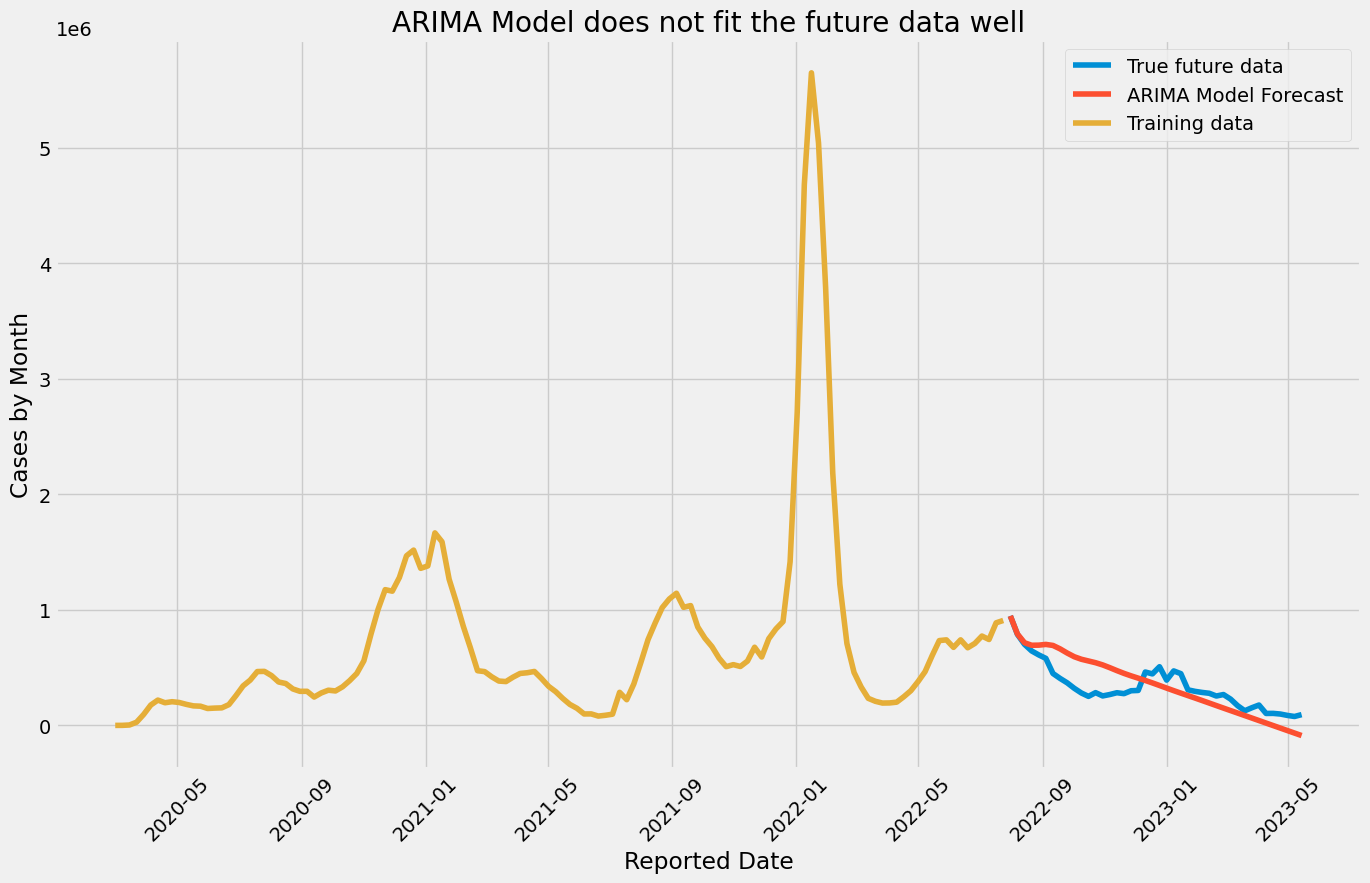

In [51]:
# Using best hyperparameters from grid search, Fit ARIMA model
arma_mod = ARIMA(y_hist, order=best_order_a).fit()  # p,d,q) values can be tuned
#model_fit = model.fit()

# Forecast next 30 days
arm_forecast = arma_mod.forecast(steps= len(y_future))
#print(forecast.head())
arm_forecast = arm_forecast.to_frame().rename(columns={'predicted_mean' : 'new_cases'})
arm_forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])


# plot the forecast
plt.plot(y_future, label = 'True future data')
plt.plot(arm_forecast, label = 'ARIMA Model Forecast')
plt.plot(y_hist, label = 'Training data')
plt.legend()
plt.xlabel('Reported Date')
plt.ylabel('Cases by Month')
plt.title('ARIMA Model does not fit the future data well')
plt.xticks(rotation = 45);

# prediction error
pred_error = y_future - arm_forecast
mae_arm = np.abs(pred_error).mean()
mse_arm = ((pred_error)**2).mean()
rmse_arm = np.sqrt((pred_error**2).mean())
print(f'MAE_ARIMA: {mae_arm}')
print(f'MSE_ARIMA: {mse_arm}')
print(f'RMSE_ARIMA: {rmse_arm}')

print(f"AIC_ARIMA: {arma_mod.aic}, BIC_ARIMA: {arma_mod.bic}")

#### **Interpretation of ARIMA model forecast:**
This plot shows COVID-19 daily new cases forecast using the ARIMA model. It shows historical data (training set), the predicted future cases, and actual future cases (test det) to evaluate the accuracy of the model.

**Training Data (Yellow Line):** The historical COVID-19 cases data shows multiple waves. There is a significant spike with 5.6M cases in early 2022, likely due to the Omicron variant. The trend decreases after the peak but fluctuates slightly in mid-2022.

**Forecast (Red Line):**
The ARIMA model predicts a gradual decline in cases after mid-2022. The forecasted values show a smooth downward trend, indicating that the model expects cases to decrease over time.
The predicted trend follows a relatively linear downward slope.

**True Future Data (Blue Line):**
The actual future case data does not perfectly match the forecast. While the overall trend aligns, there are fluctuations and deviations from the ARIMA prediction.
The real data shows more variability, suggesting external factors influencing case numbers that ARIMA did not fully capture.

### **Evaluation Metrics for ARIMA Model**  
These metrics help evaluate the accuracy of the ARIMA model in forecasting COVID-19 cases.

##### **1. Mean Absolute Error (MAE):** **134,360.85**  
- MAE represents the average absolute difference between actual and predicted values.
- An MAE of **134,360** means that, on average, the model’s predictions deviate by **134,360 new cases** from the actual values.
- **Lower MAE indicates a better model fit.**  

##### **2. Mean Squared Error (MSE):** **2.48 × 10¹⁰ (24.81 billion)**  
- MSE calculates the average squared difference between actual and predicted cases.
- A high MSE suggests that the model has **some large deviations**, due sudden spikes in cases.

##### **3. Root Mean Squared Error (RMSE):** **157,527.53**  
- RMSE is the square root of MSE and provides an interpretable error in the original unit (number of cases).
- An RMSE of **157,527** indicates that the model’s predictions typically vary by this amount.
- **Compared to MAE, RMSE penalizes larger errors more.**  

##### **4. Akaike Information Criterion (AIC):** **3380.63**  
- AIC is used for model selection—lower values indicate a better fit with fewer parameters.
- **AIC = 3380.63 suggests that the model is reasonable, but a lower value would indicate a better trade-off between accuracy and complexity.**

##### **5. Bayesian Information Criterion (BIC):** **3397.55**  
- Like AIC, BIC penalizes model complexity more heavily.
- A **higher BIC suggests potential overfitting**, meaning the model might be too complex for the data.




### **ARIMA Model Performance Analysis**
The MAE and RMSE values suggest that the ARIMA model provides a reasonable estimate of COVID-19 cases.  The forecast captures the general downward trend but **does not predict fluctuations accurately**. ARIMA is limited in handling sudden surges or policy-driven changes (e.g., new variants, lockdowns, or reporting anomalies).
**Errors are still significant**: Given the scale of COVID-19 cases, errors in the range of 100,000+ cases may impact policy decisions.  

**Next Steps:** Consider using SARIMA for capturing seasonality.


# **SARIMA Model for Forecasting**


Optimal SARIMA order (based on lowest MAE, then RMSE): (1, 0, 1), (0, 0, 1, 12)
AIC_SRM: 3115.45
Best MAE SRM: 93492.03
Best RMSE SRM: 120133.13


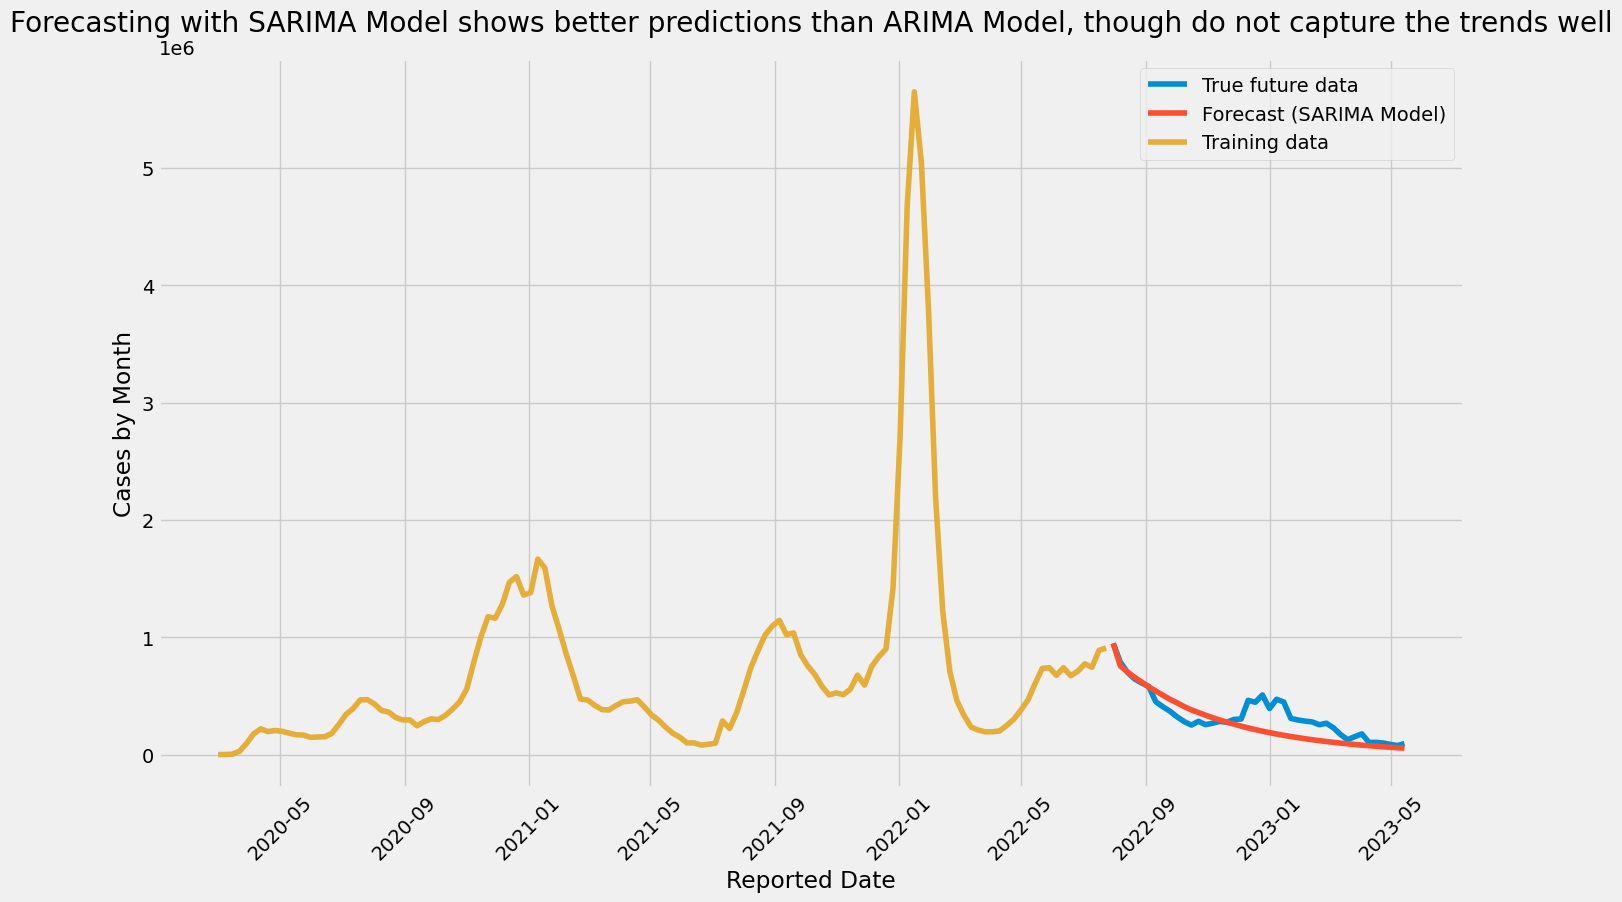

SARIMA MAE: new_cases    97100.097745
dtype: float64
SARIMA MSE: new_cases    1.638419e+10
dtype: float64
SARIMA RMSE: new_cases    128000.759815
dtype: float64
SARIMA AIC: 3462.81, SARIMA BIC: 3474.15


In [52]:
# load SARIMA model from statsmodel

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, q, P, D, Q, and s values for the SARIMA model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic_s = float("inf")
best_order_s = None
best_seasonal_order = None
best_model_s = None
best_mae_s = float('inf')
best_rmse_s = float('inf')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            srm_mod = SARIMAX(y_hist,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = srm_mod.fit()

            srm_predictions = results.predict(start=len(y_hist), end=len(us_df)-1)
            mae_srm = mean_absolute_error(y_future, srm_predictions)
            rmse_srm = np.sqrt(mean_squared_error(y_future, srm_predictions))

            if mae_srm < best_mae_s:  # Prioritize lowest MAE
              best_mae_s = mae_srm
              best_rmse_s = rmse_srm
              best_aic_s = results.aic
              best_order_s = param
              best_seasonal_order = param_seasonal
              best_model_s = results
            elif mae_srm == best_mae_s and rmse_srm < best_rmse_s: # If MAE is the same, choose the one with lower RMSE
              best_rmse_s = rmse_srm
              best_aic_s= results.aic
              best_order_s = param
              best_seasonal_order = param_seasonal
              best_model_s= results

        except Exception as e:
            print(f"Error fitting SARIMA model with order {param} and seasonal order {param_seasonal}: {e}")

print(f"Optimal SARIMA order (based on lowest MAE, then RMSE): {best_order_s}, {best_seasonal_order}")
print(f"AIC_SRM: {best_aic_s:.2f}")
print(f"Best MAE SRM: {best_mae_s:.2f}")
print(f"Best RMSE SRM: {best_rmse_s:.2f}")


# Fit the best SARIMA model
sarima_mod = SARIMAX(y_hist, order=best_order_s, seasonal_order=best_seasonal_order).fit()

# Forecast future values
srm_forecast = sarima_mod.forecast(steps=len(y_future))
srm_forecast = srm_forecast.to_frame().rename(columns={'predicted_mean':'new_cases'})
srm_forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])


# Plot the forecast
plt.plot(y_future, label='True future data')
plt.plot(srm_forecast, label='Forecast (SARIMA Model)')
plt.plot(y_hist, label='Training data')
plt.legend()
plt.xlabel('Reported Date')
plt.ylabel('Cases by Month')
plt.title('Forecasting with SARIMA Model shows better predictions than ARIMA Model, though do not capture the trends well')
plt.xticks(rotation=45)
plt.show()


# Prediction error
pred_error_s = y_future - srm_forecast
mae_s = np.abs(pred_error_s).mean()
mse_s = ((pred_error_s)**2).mean()
rmse_s= np.sqrt((pred_error_s**2).mean())
print(f"SARIMA MAE: {mae_s}")
print(f"SARIMA MSE: {mse_s}")
print(f"SARIMA RMSE: {rmse_s}")

print(f"SARIMA AIC: {sarima_mod.aic:.2f}, SARIMA BIC: {sarima_mod.bic:.2f}")


### **SARIMA Model Evaluation Metrics**  

The **SARIMA (Seasonal ARIMA) model** incorporates seasonality into forecasting, making it suitable for time series data with recurring patterns.

#### **1. MAE:** 97,100.10
- **Compared to ARIMA (134,360 cases), SARIMA performs better**, reducing the average error by **~37,000 cases**.

#### **2. MSE:** 1.64 × 10¹⁰ (16.38 billion)
- **SARIMA's MSE is lower than ARIMA's (24.81 billion), meaning it handles large fluctuations better**.

#### **3. RMSE:** 128,000.76  
- **SARIMA's RMSE (128,000) is lower than ARIMA's (157,527),** suggesting it makes fewer large errors.

#### **4. AIC:** 3462.81\
- SARIMA’s AIC (3462.81) is slightly higher than ARIMA’s (3380.63), meaning ARIMA has a better balance of fit and simplicity.

#### **5. BIC:** 3474.15  
- SARIMA’s BIC (3474.15) is slightly higher than ARIMA’s (3397.55), implying SARIMA might be slightly more complex.




### **Model Performance Analysis:**

#### Based on the metrics,  **SARIMA outperforms ARIMA** in accuracy:

Lower MAE, MSE, and RMSE indicate better predictive performance. The reduction in errors suggests that SARIMA effectively captures seasonal trends in COVID-19 cases.

#### SARIMA has a slightly higher AIC & BIC:

This suggests the model is a bit more complex than ARIMA, but its improved accuracy justifies the trade-off.

**Next Steps:**
Consider feature engineering using the data, e.g. weekly growth rate, rolling average, and reproduction number and then perform SARIMA with those exogeneous variables.


# **exog SARIMA Model**
### Here we will perform some feature engineering to improve the SARIMA model predictions.

MAE EXOG SARIMA: 79852.14
RMSE EXOG SARIMA: 93150.65
AIC: 3669.55, BIC: 3689.84


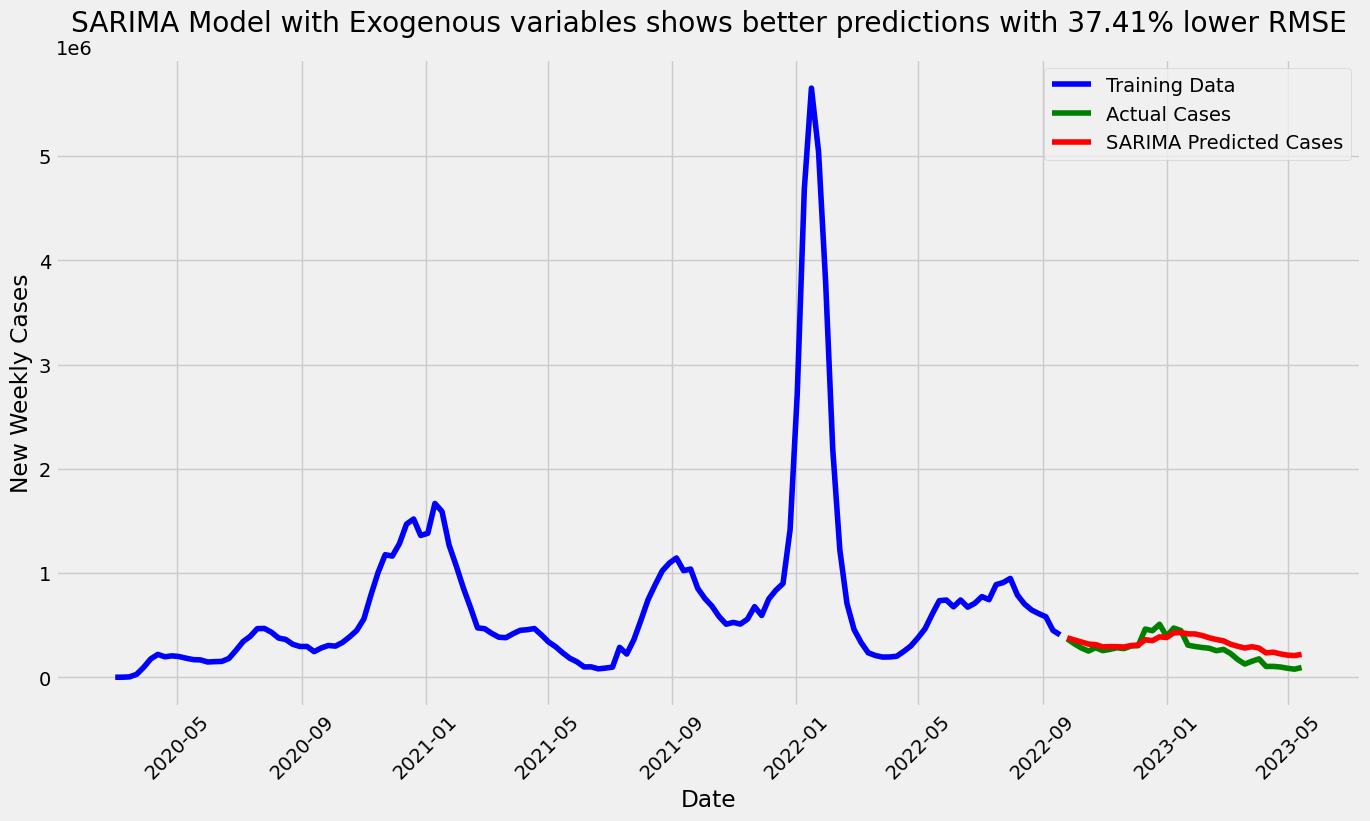

In [53]:
# 7-week moving average
us_df['7_week_MA'] = us_df['new_cases'].rolling(window=7).mean()

# Week-over-week growth rate
us_df['weekly_growth_rate'] = ((us_df['new_cases'] - us_df['new_cases'].shift(1)) / us_df['new_cases'].shift(1)) * 100

# Reproduction number (weekly R₀ approximation)
serial_interval_weeks = 1
us_df['R_t'] = us_df['new_cases'] / us_df['new_cases'].shift(serial_interval_weeks)

# Fill any NaNs from shifts
us_df.fillna(method='bfill', inplace=True)

# train and split the data
train_size = int(len(us_df) * 0.8)
train, test = us_df.iloc[:train_size], us_df.iloc[train_size:]

# Weekly data with external regressors
model = SARIMAX(
    train['new_cases'],
    exog=train[['7_week_MA', 'weekly_growth_rate', 'R_t']],
    order=(1, 0, 1),          # Autoregressive, differencing, moving average
    seasonal_order=(0, 0, 1, 8)  # Weekly seasonality (52 weeks/year)
)

# fit the model
model_fit = model.fit(disp=False)

exog_test = test[['7_week_MA', 'weekly_growth_rate', 'R_t']]

predictions = model_fit.predict(start=len(train), end=len(us_covid)-1, exog=exog_test)


# # Prediction error
mae = mean_absolute_error(test['new_cases'], predictions)
print(f"MAE EXOG SARIMA: {mae:.2f}")
rmse = np.sqrt(mean_squared_error(test['new_cases'], predictions))
print(f"RMSE EXOG SARIMA: {rmse:.2f}")


print(f"AIC: {model_fit.aic:.2f}, BIC: {model_fit.bic:.2f}")

# Plotting the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(train['new_cases'], label='Training Data', color='blue')
plt.plot(test['new_cases'], label='Actual Cases', color='green')
plt.plot(test.index, predictions, label='SARIMA Predicted Cases', color='red')
plt.legend()
plt.title('SARIMA Model with Exogenous variables shows better predictions with 37.41% lower RMSE')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('New Weekly Cases')
plt.show()

In [54]:
# Calcualte the % change in mae from SaRIMA with no feature and SARIMA with EXog
sarima = 97100.098177
sarima_exog = 79856.35
# perc_change in the mae
perc_mae = ((sarima - sarima_exog) / sarima_exog) * 100
print(f"Percentage change in MAE: {perc_mae:.2f}%")

Percentage change in MAE: 21.59%


In [55]:
# Calcualte the % change in rmse from SaRIMA with no feature and SARIMA with EXog
sarima_rmse = 128000.76
sarima_exog_rmse = 93155.53
# perc_change in the mae
perc_rmse = ((sarima_rmse - sarima_exog_rmse) / sarima_exog_rmse) * 100
print(f"Percentage change in RMSE: {perc_rmse:.2f}%")


Percentage change in RMSE: 37.41%


### **EXOG SARIMA** model evaluation metrics

### **1. MAE**  
- **Exog SARIMA:** 79,856.35 *(Best performer — ~18% improvement over SARIMA)*  
 Exog SARIMA reduces the error by incorporating external variables (e.g., growth rate, reproduction number), improving predictive accuracy.  

### **2. RMSE**
- **Exog SARIMA:** 93,155.53 *(Best performer — ~27% improvement over SARIMA)*  
Exog SARIMA again performs better, handling larger errors and spikes more effectively (RMSE penalizes large deviations more than MAE).  

### **3. AIC (Akaike Information Criterion)**
- **Exog SARIMA:** 3669.55 *(Worse — more complex due to exogenous variables)*  

**Exog SARIMA** has a higher AIC because it’s more complex, but it trades that complexity for **better forecasting accuracy** (lower MAE/RMSE).  

### **4. BIC (Bayesian Information Criterion)**    
- **Exog SARIMA:** 3689.84 *(Worse — again, complexity penalty)*  

BIC, which penalizes complexity even more than AIC, favors ARIMA. But since ARIMA’s errors are higher, the trade-off may not be worth it.  

### **Key Insights:**  
- **Exog SARIMA** performs better **forecasting accuracy (MAE & RMSE)** — the inclusion of external features like **growth rates, reproduction number, or rolling average** improves performance significantly.  

### **Next Steps:**  
*Explore alternative models* —  Randomforest, XGBoost, RNN, LSTM


# **Random Forest Model**

In [56]:
us_df.head()

,new_cases,7_week_MA,weekly_growth_rate,R_t
date_reported,,,,
2020-03-01,33.0,74513.142857,1084.848485,11.848485
2020-03-08,391.0,74513.142857,1084.848485,11.848485
2020-03-15,3465.0,74513.142857,786.189258,8.861893
2020-03-22,27486.0,74513.142857,693.246753,7.932468
2020-03-29,94894.0,74513.142857,245.244852,3.452449


Random Forest Performance:
MAE: 68322.60
MSE: 6617622952.00
RMSE: 81348.77


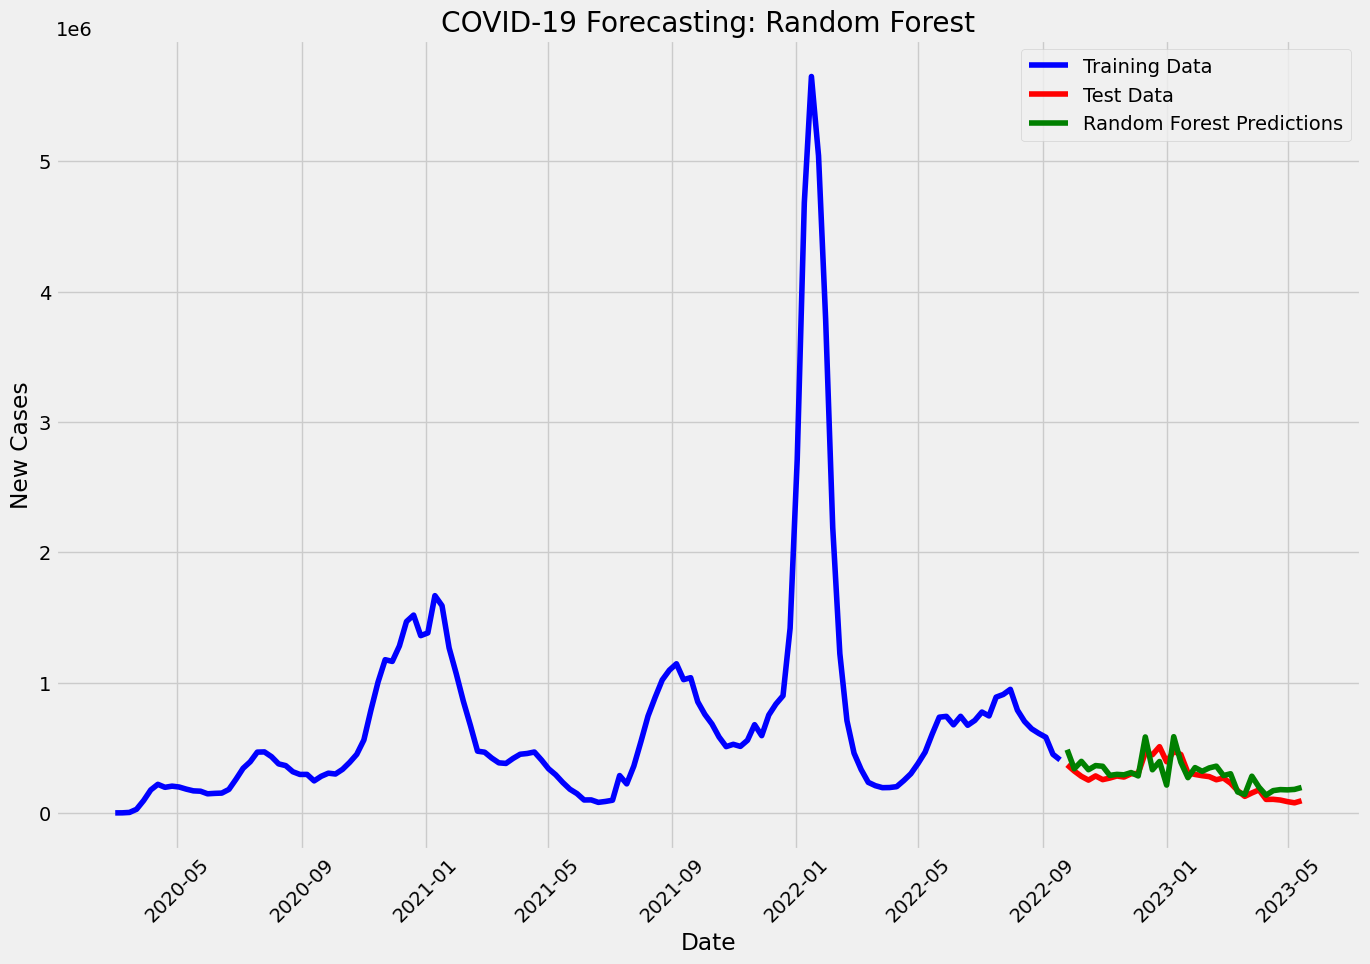

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 7-week moving average
us_df['7_week_MA'] = us_df['new_cases'].rolling(window=7).mean()

# Week-over-week growth rate
us_df['weekly_growth_rate'] = ((us_df['new_cases'] - us_df['new_cases'].shift(1)) / us_df['new_cases'].shift(1)) * 100

# Reproduction number (weekly R₀ approximation)
serial_interval_weeks = 1
us_df['R_t'] = us_df['new_cases'] / us_df['new_cases'].shift(serial_interval_weeks)

# Fill any NaNs from shifts
us_df.fillna(method='bfill', inplace=True)

# # Define features and target
features = ['7_week_MA', 'weekly_growth_rate', 'R_t']
X = us_df[features]
y = us_df['new_cases']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# define the random forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

# fit the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions)):.2f}")
#print(f"R² Score: {r2_score(y_test, rf_predictions):.2f}")

#plot the train data, test data and predicted data
plt.figure(figsize=(15, 10))

#plt.plot(us_df.index, y, label="Actual Cases", color="green")
plt.plot(X_train.index, y_train, label="Training Data", color="blue")
plt.plot(X_test.index, y_test, label="Test Data", color="red")
plt.plot(X_test.index, rf_predictions, label="Random Forest Predictions", color="green")


plt.legend()
plt.title("COVID-19 Forecasting: Random Forest")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# **XGBoost Model**

In [58]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Performance:")
print(f"MAE: {mean_absolute_error(y_test, xgb_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, xgb_predictions):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_predictions)):.2f}")
#print(f"R² Score: {r2_score(y_test, xgb_predictions):.2f}")

XGBoost Performance:
MAE: 122012.04
MSE: 32854937923.63
RMSE: 181259.31


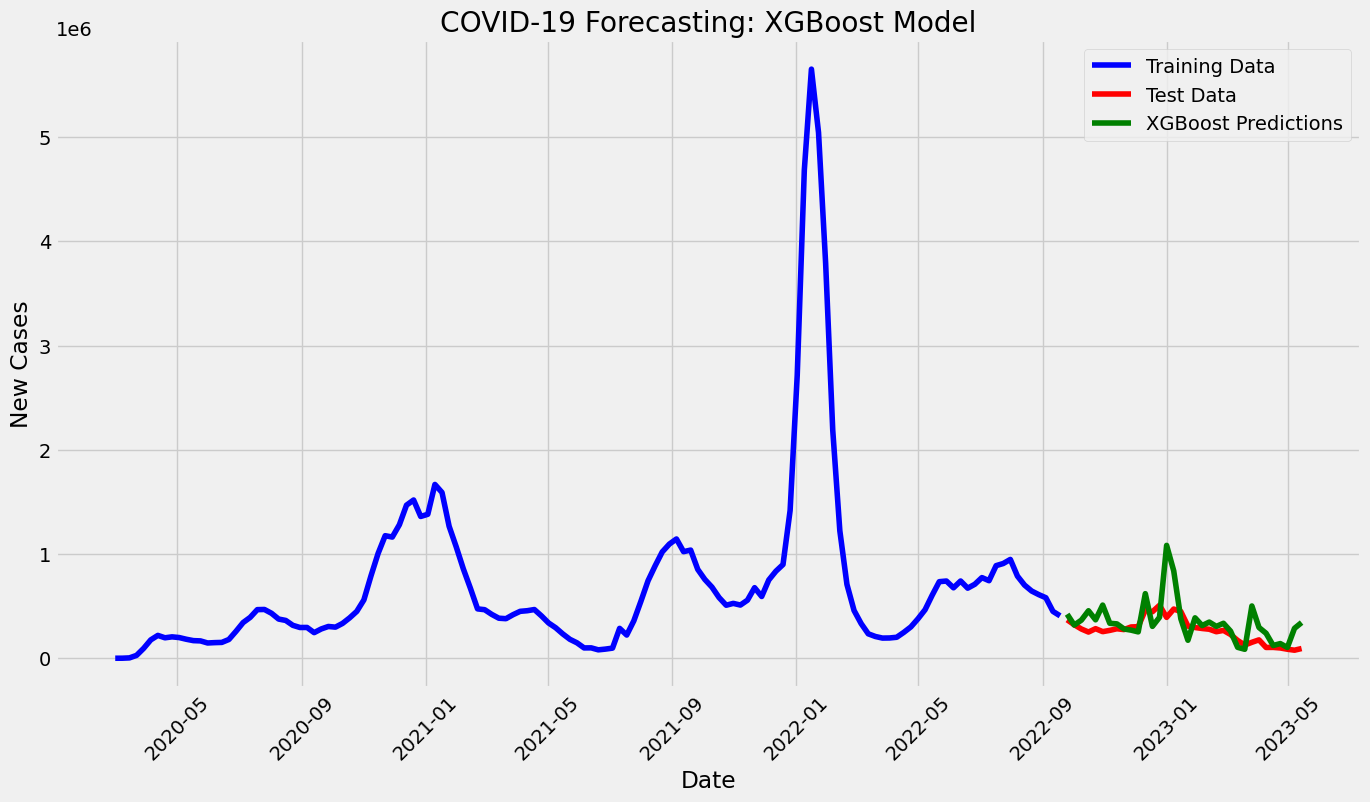

In [59]:
#plot the train data, test data and predicted data
plt.figure(figsize=(15, 8))

#plt.plot(us_df.index, y, label="Actual Cases", color="green")
plt.plot(X_train.index, y_train, label="Training Data", color="blue")
plt.plot(X_test.index, y_test, label="Test Data", color="red")
plt.plot(X_test.index, xgb_predictions, label="XGBoost Predictions", color="green")

plt.legend()
plt.title("COVID-19 Forecasting: XGBoost Model")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("New Cases")
plt.grid(True)
plt.show()

# **Long Short-Term Memory (LSTM) Model**
Here we will process the data for LSTM model fitting.

In [60]:
# first reload the data to preprocess for neural network models
covid_data = pd.read_csv('us_covid.csv')
covid_data.head(5)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,new_cases_log,cumulative_cases_log,new_deaths_log,cumulative_deaths_log
0,2020-03-01,United States of America,AMRO,33.0,73,1.0,1,2020,3.526361,4.304065,0.693147,0.693147
1,2020-03-08,United States of America,AMRO,391.0,464,18.0,19,2020,5.971262,6.142037,2.944439,2.995732
2,2020-03-15,United States of America,AMRO,3465.0,3929,50.0,69,2020,8.150756,8.276395,3.931826,4.248495
3,2020-03-22,United States of America,AMRO,27486.0,31415,305.0,374,2020,10.221468,10.355073,5.723585,5.926926
4,2020-03-29,United States of America,AMRO,94894.0,126309,1732.0,2106,2020,11.460526,11.746494,7.457609,7.653020


In [61]:
#separate months from date
covid_data['month'] = pd.DatetimeIndex(covid_data['date_reported']).month
covid_data.head(5)

,date_reported,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths,year,new_cases_log,cumulative_cases_log,new_deaths_log,cumulative_deaths_log,month
0,2020-03-01,United States of America,AMRO,33.0,73,1.0,1,2020,3.526361,4.304065,0.693147,0.693147,3
1,2020-03-08,United States of America,AMRO,391.0,464,18.0,19,2020,5.971262,6.142037,2.944439,2.995732,3
2,2020-03-15,United States of America,AMRO,3465.0,3929,50.0,69,2020,8.150756,8.276395,3.931826,4.248495,3
3,2020-03-22,United States of America,AMRO,27486.0,31415,305.0,374,2020,10.221468,10.355073,5.723585,5.926926,3
4,2020-03-29,United States of America,AMRO,94894.0,126309,1732.0,2106,2020,11.460526,11.746494,7.457609,7.653020,3


In [62]:
# drop all the columns except year, month and new_cases and call it us_cov
us_cov = covid_data[['year','month','new_cases']]
us_cov.head(5)

,year,month,new_cases
0,2020,3,33.0
1,2020,3,391.0
2,2020,3,3465.0
3,2020,3,27486.0
4,2020,3,94894.0


In [63]:
us_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       168 non-null    int64  
 1   month      168 non-null    int32  
 2   new_cases  168 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.4 KB


In [64]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import torch
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)



data = us_cov[['new_cases']]

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences (e.g., 7 days history to predict the next day)
def create_sequences(data, time_steps=7):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=180, batch_size=42, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Convert data to tensors for plotting in requested style
train_label = [torch.tensor(val) for val in y_train_rescaled]
test_label = [torch.tensor(val) for val in y_test_rescaled]
train_pred = [torch.tensor(val) for val in train_predictions]
test_pred = [torch.tensor(val) for val in test_predictions]


# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_mae = mean_absolute_error(y_train_rescaled, train_predictions)
test_mae = mean_absolute_error(y_test_rescaled, test_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_rescaled, test_predictions))

print(f"LSTM Training MAE: {train_mae:.2f}")
print(f"LSTM Test MAE: {test_mae:.2f}")
print(f"LSTM Training RMSE: {train_rmse:.2f}")
print(f"LSTM Test RMSE: {test_rmse:.2f}")


Epoch 1/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - loss: 0.0327 - val_loss: 4.5618e-04
Epoch 2/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0210 - val_loss: 0.0044
Epoch 3/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0190 - val_loss: 0.0074
Epoch 4/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0197 - val_loss: 0.0048
Epoch 5/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0193 - val_loss: 0.0025
Epoch 6/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0183 - val_loss: 0.0019
Epoch 7/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0186 - val_loss: 0.0020
Epoch 8/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0179 - val_loss: 0.0025
Epoch 9/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0168 - val_loss: 0.0032
Epoch 10/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0166 - val_loss: 0.0033
Epoch 11/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0178 - val_loss: 0.0028
Epoch 12/180
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0168 - v

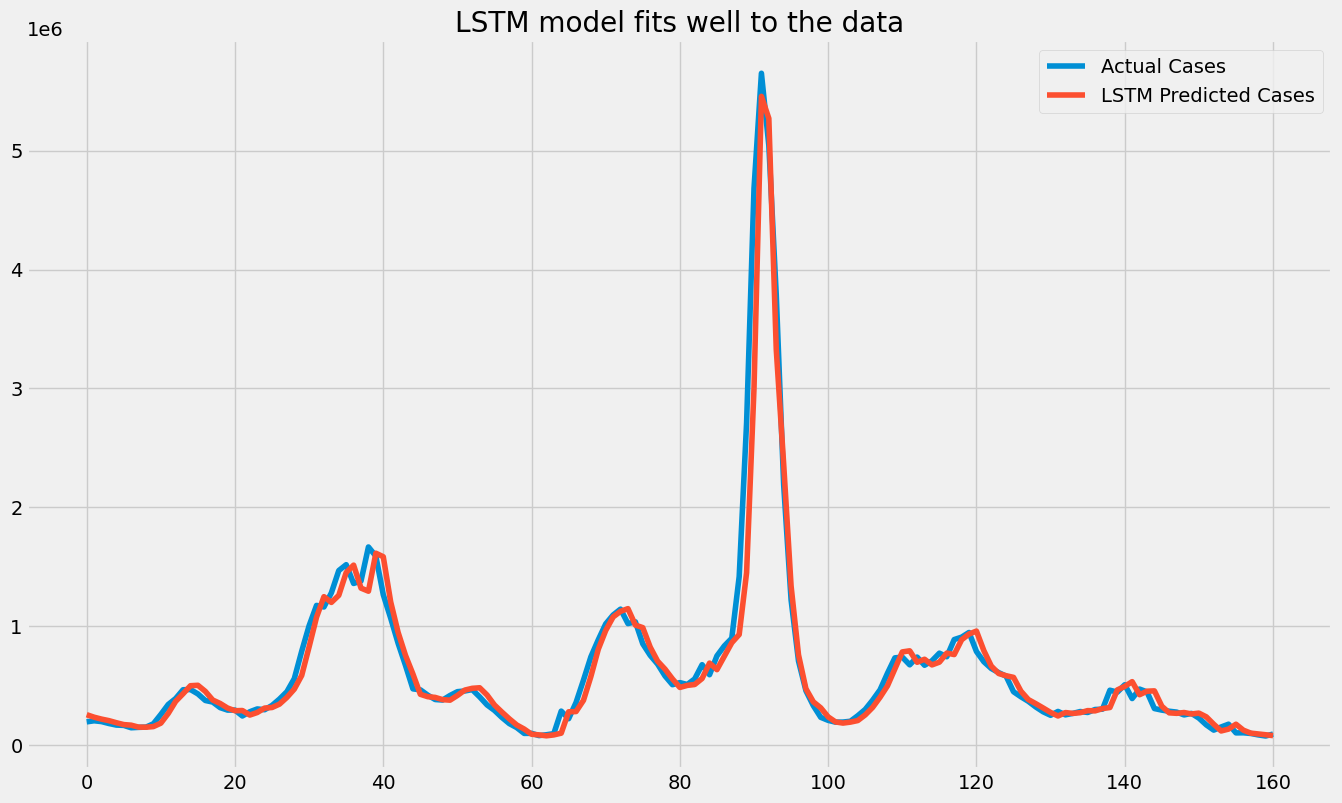

In [65]:
# Plot in the requested format
plt.title("LSTM model fits well to the data")
plt.plot([x.detach().numpy() for x in train_label] + [x.detach().numpy() for x in test_label], label='Actual Cases')
plt.plot([x.detach().numpy() for x in train_pred] + [x.detach().numpy() for x in test_pred], label='LSTM Predicted Cases')
plt.legend()
plt.grid(True)
plt.show()


# **Model Performance Analysis**
Here I am providing the comparison chart of the models and their performances.

Model	MAE	MSE	RMSE	AIC	BIC
ARIMA	134,360.86	2.48e+10	157,527.53	3380.63	3397.55
SARIMA	97,100.10	1.64e+10	128,000.76	3462.81	3474.15
EXOG SARIMA	79,852.14	N/A	93,150.65	3669.55	3689.84
Random Forest	68,322.60	N/A	N/A	N/A	N/A
XGBoost	122,012.04	N/A	328,549,379.24	N/A	N/A
LSTM (Training)	81,126.04	N/A	185,258.85	N/A	N/A
LSTM (Test)	38,242.36	N/A	56,711.65	N/A	N/A


In [66]:

# Data for the comparison
data = {
    "Model": [
        "ARIMA", "SARIMA", "EXOG SARIMA", "Random Forest",
        "XGBoost", "LSTM (Training)", "LSTM (Test)"
    ],
    "MAE": [
        134360.86, 97100.10, 79852.14, 68322.60,
        122012.04, 81126.04, 38242.36
    ],
    "MSE": [
        2.48e+10, 1.64e+10, None, 6.6e+9,
        3.28e+10, None, None
    ],
    "RMSE": [
        157527.53, 128000.76, 93150.65, 81348.77,
        181259.31, 185258.85, 56711.65
    ],
    "AIC": [
        3380.63, 3462.81, 3669.55, None,
        None, None, None
    ],
    "BIC": [
        3397.55, 3474.15, 3689.84, None,
        None, None, None
    ]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

# Display the DataFrame
display(df_comparison)


,Model,MAE,MSE,RMSE,AIC,BIC
0,ARIMA,134360.86,2.480000e+10,157527.53,3380.63,3397.55
1,SARIMA,97100.10,1.640000e+10,128000.76,3462.81,3474.15
2,EXOG SARIMA,79852.14,NaN,93150.65,3669.55,3689.84
3,Random Forest,68322.60,6.600000e+09,81348.77,NaN,NaN
4,XGBoost,122012.04,3.280000e+10,181259.31,NaN,NaN
5,LSTM (Training),81126.04,NaN,185258.85,NaN,NaN
6,LSTM (Test),38242.36,NaN,56711.65,NaN,NaN


# **Deployment Strategy**

### A. Deployment Environment
•	Cloud Platform: AWS EC2 (or alternatives like Azure/GCP)
•	API Framework: Flask/FastAPI for serving predictions
•	Containerization: Docker for reproducibility

### B. Model Pipeline
1.	Data Ingestion: Pulls the latest COVID-19 data daily
2.	Preprocessing: Data cleaning, scaling, feature engineering
3.	Prediction: Generates future forecasts
4.	Visualization: Displays predictions in a web app

### C. Endpoint Setup
•	Input: Date range, exogenous variables
•	Output: Predicted new COVID-19 cases
•	Endpoint Example: /predict?start=2025-03-18&days=60&reproduction number=0.89


# **Report of the Project**

### **1. Introduction**
The COVID-19 pandemic has profoundly impacted public health and the economy, necessitating forecasting and risk prediction models to help decision-making. Accurate forecasting of COVID-19 cases can assist policymakers, healthcare professionals, and researchers in optimizing resource allocation, implementing timely interventions, and mitigating the spread of the virus.
Goal: The primary goal of this project is to explore the COVID-19 trends around the globe and to develop a machine learning model to predict the daily new cases in the United States. This will involve:
•	Time Series Forecasting: predicting the daily number of new cases over the next few months.
### **2. Data Overview**
•	Dataset: WHO COVID-19 dataset
•	Time Period: Covers cases from early 2020 to 2023
•	Target Variable: New COVID-19 cases reported daily
•	Data Size: It consists of 57,840 entries and 8 columns.
•	Data Preprocessing: Handled missing values, ensured stationarity and applied log transformation for stabilization
### **3. Methodology**

**Exploratory Data Analysis (EDA)**
We used EDA to understand the distribution and trends of COVID-19 cases and deaths across different regions and countries.

**Forecasting Models**
We used 6 time series models to predict the future COVID-19 cases in the USA.

- ARIMA (AutoRegressive Integrated Moving Average): A widely used model for non-seasonal time series forecasting.
- SARIMA (Seasonal ARIMA): An extension of ARIMA that accounts for seasonality in the data.

- Exog SARIMA — extends SARIMA by adding external factors (e.g., growth rate, reproduction number).
- Random Forest Regressor — handles time-lagged features and complex relationships.
- XGBoost — gradient boosting approach.
- LSTM — neural networks designed for sequential data.


### **4. Model Evaluation**
Each model was evaluated using MAE, MSE, RMSE, AIC, and BIC metrics.

Model Evaluation Observations:
1.	ARIMA vs. SARIMA:
- SARIMA outperforms ARIMA with lower MAE and RMSE.
- AIC/BIC values slightly favor ARIMA, but SARIMA’s improved accuracy outweighs this.
2.	EXOG SARIMA:
- Incorporating exogenous factors improved MAE, MSE, and RMSE compared to ARIMA/SARIMA.
- AIC/BIC values indicate a slightly worse fit but are offset by improved prediction accuracy.
3.	Random Forest:
- Achieved significantly lower MAE than ARIMA and SARIMA, indicating strong absolute error reduction.
4.	XGBoost:
- Higher MAE and RMSE suggest it struggles more with this dataset compared to Random Forest.
5.	LSTM (Training vs. Test):
- LSTM (Training) performed decently, but LSTM (Test) yielded the best overall performance.
 - LSTM (Test) demonstrates strong generalization, outperforming statistical methods and other machine learning models.

### **5. Results and Analysis**
**EDA provides the following insights:**

-	The EMRO and EURO regions show a higher frequency of case counts, whereas other regions exhibit a wider range of variation.
-	The distribution of new deaths across regions is right-skewed, indicating many days with low deaths but occasional extreme spikes, suggesting outbreaks.
-	The data reveals multiple peaks, likely corresponding to different COVID-19 waves, such as the Delta and Omicron variants.
-	The EURO region had the highest number of cases at the beginning of 2022, while WPRO saw the highest cases at the end of 2022.
-	The USA recorded the highest number of new cases at the start of 2022, and China had the highest cases by the end of the year.

- Analysis of death surges indicated about six major waves, with the highest peaks occurring in early 2021 and early 2022 due to insufficient intervention measures.
-	The highest death toll was observed in the US, particularly during early 2021 and early 2022, whereas India experienced a massive surge in mid-2021 due to the Delta variant.


 **Modeling provides the following insights:**

SARIMA outperforms ARIMA in terms of accuracy (lower MAE, MSE, and RMSE), suggesting that seasonality plays a significant role in COVID-19 case trends.
-	ARIMA has a lower AIC and BIC, indicating a slightly simpler model, but at the cost of higher prediction errors.
-	The forecasted trends from SARIMA align more closely with the actual future data, validating its suitability for COVID-19 forecasting.

### **6. Visual Insights**

-	The forecast plots indicate that Exog SARIMA and LSTM (test) provides a more accurate representation of future trends, capturing both periodic fluctuations and general trends.
-	Other models deviate more significantly from actual data, particularly in high-variance periods.

### **7. Conclusion**
The LSTM model is the best choice for forecasting COVID-19 cases due to its superior performance in handling seasonality. This model will help public health officials and policymakers make informed decisions regarding pandemic response and resource allocation.

### **8. Recommendations**
- LSTM (Test) should be the preferred model for deployment due to its superior performance, with the lowest MAE and RMSE, indicating better generalization to unseen data.

**Further Improvements:**
 Fine-tuning the LSTM architecture (e.g., adjusting learning rate, adding dropout layers) or experimenting with hybrid models (e.g., combining LSTM with SARIMA for residual modeling) could enhance accuracy even more.

**Deployment Strategy:**
- Automate model updates with real-time data streams to keep forecasts accurate as new COVID-19 data becomes available.
- Integrate model monitoring to detect performance degradation over time and trigger retraining when necessary.


